In [1]:
import cdsapi
import climetlab as cml
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import geopy
import xarray as xr
import pandas as pd

import csv
import os
import pickle

import scipy
import sklearn 
from sklearn.cluster import KMeans

import seaborn as sns

In [2]:
with open("entry_table.dat", "rb") as f:
    final_table = pickle.load(f) 

In [3]:
states = ["Alaska", "Alabama", "Arkansas", "Arizona", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]

In [14]:
# state_dict = {}
# for i in range(len(states)):
#     state_dict[states[i]] = i

In [4]:
all_states = []
for i in states:
    state_info = []
    for j in final_table:
        if i in str(j['Location'].address):
            state_info.append(j)
    all_states.append(state_info)

In [5]:
state_dict = {}
for i in range(len(states)):
    state_dict[states[i]] = all_states[i]

print(state_dict)

{'Alaska': [], 'Alabama': [{'Location':                      geometry                 address
0  POINT (-86.82953 33.25888)  Alabama, United States, 'Day': '03', 'Month': '01', 'Year': '2022', 'ID': 2}, {'Location':                      geometry                 address
0  POINT (-86.82953 33.25888)  Alabama, United States, 'Day': '16', 'Month': '01', 'Year': '2022', 'ID': 5}, {'Location':                      geometry                 address
0  POINT (-86.82953 33.25888)  Alabama, United States, 'Day': '12', 'Month': '03', 'Year': '2022', 'ID': 21}, {'Location':                      geometry                 address
0  POINT (-86.82953 33.25888)  Alabama, United States, 'Day': '31', 'Month': '03', 'Year': '2022', 'ID': 30}, {'Location':                      geometry                 address
0  POINT (-86.82953 33.25888)  Alabama, United States, 'Day': '30', 'Month': '11', 'Year': '2022', 'ID': 81}, {'Location':                      geometry                 address
0  POINT (-86.82953 33.

In [9]:
for i in final_table:
    if 'York' in str(i['Location'].address):
        print(i)
        file_name = i['Month'] + '-' + i['Day'] + '-' + i['Year'] + '.nc'
        x = xr.open_dataset('../datafiles/' + file_name)
        currLocation = i['Location']
        # print(x)
        # lat = []
        # lon = []
        # for j in range(100):
        #     diff_lat = (j - 1) * 0.25
        #     for k in range(100):
        #         diff_lon = (k - 1) * 0.25
        #         lat.append(currLocation.geometry.y.values[0] + diff_lat)
        #         lon.append(currLocation.geometry.x.values[0]+360 + diff_lon)

        datetime = i['Year'] + '-' + i['Month'] + '-' + i['Day'] + 'T12:00:00'


        lat = currLocation.geometry.y.values[0]
        lon = currLocation.geometry.x.values[0] + 360
        locate =  x.sel(latitude=slice(lat+12.5,lat-12.5), longitude=slice(lon-12.5,lon+12.5))
        # print(locate)
        # print(locate.sf)
        # print(locate.sf.to_numpy())
        # print(locate.u10.to_numpy())
        # print(locate.v10.to_numpy())
        wind_ave = np.sqrt(np.square(locate.u10.to_numpy())+np.square(locate.v10.to_numpy()))
        
        # print(wind_ave)
        


{'Location':                      geometry                          address
0  POINT (-74.26185 41.86893)  Ulster, New York, United States, 'Day': '04', 'Month': '02', 'Year': '2022', 'ID': 14}
<xarray.Dataset>
Dimensions:    (longitude: 100, latitude: 100)
Coordinates:
  * longitude  (longitude) float32 273.2 273.5 273.8 274.0 ... 297.5 297.8 298.0
  * latitude   (latitude) float32 54.25 54.0 53.75 53.5 ... 30.0 29.75 29.5
    time       datetime64[ns] 2022-02-04T12:00:00
Data variables:
    u10        (latitude, longitude) float32 ...
    v10        (latitude, longitude) float32 ...
    t2m        (latitude, longitude) float32 ...
    sf         (latitude, longitude) float32 ...
    sp         (latitude, longitude) float32 ...
    tp         (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-01-25 07:45:09 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...
{'Location':                      geometry                          address
0  POINT (-75.8404

In [10]:
snow = locate.sf.to_numpy()
temp = locate.t2m.to_numpy()
print(snow.shape)
print(wind_ave.shape)

(100, 100)
(100, 100)


In [11]:
sf1d = snow.ravel()
print(sf1d)
w1d = wind_ave.ravel()
print(w1d)
t1d = temp.ravel()

[0. 0. 0. ... 0. 0. 0.]
[ 3.3849232  3.4527605  3.580342  ... 10.000216   9.879075   9.762298 ]


In [7]:
plt.scatter(t1d,w1d)
plt.show()

In [18]:
max = 0
state_most = ''
for i in range(len(states)):
    if (len(all_states[i]) > max):
        max = len(all_states[i])
        state_most = states[i]
print(state_most)

Texas


In [19]:
print(state_dict['Texas'])

[{'Location':                      geometry                         address
0  POINT (-95.62582 31.78192)  Anderson, Texas, United States, 'Day': '21', 'Month': '03', 'Year': '2022', 'ID': 25}, {'Location':                      geometry                       address
0  POINT (-95.37412 29.81198)  Harris, Texas, United States, 'Day': '22', 'Month': '05', 'Year': '2022', 'ID': 39}, {'Location':                      geometry                       address
0  POINT (-95.37412 29.81198)  Harris, Texas, United States, 'Day': '10', 'Month': '08', 'Year': '2022', 'ID': 59}, {'Location':                       geometry                        address
0  POINT (-106.22304 31.80722)  El Paso, Texas, United States, 'Day': '22', 'Month': '08', 'Year': '2022', 'ID': 60}, {'Location':                      geometry                               address
0  POINT (-97.33570 32.75137)  Tarrant County, Texas, United States, 'Day': '04', 'Month': '09', 'Year': '2022', 'ID': 62}, {'Location':                  

In [21]:
means = xr.open_dataset('../../a/state_means/global_mean.nc')
for i in states:
    state_coords = geopandas.tools.geocode(i)
    # datetime = i['Year'] + '-' + i['Month'] + '-' + i['Day'] + 'T12:00:00'

    print(state_coords)
    lat = state_coords.geometry.y.values[0]
    lon = state_coords.geometry.x.values[0] + 360
    locate =  means.sel(latitude=slice(lat+12.5,lat-12.5), longitude=slice(lon-12.5,lon+12.5))
    locate.to_netcdf('../../a/state_means/' + i + '_mean.nc')
    

                      geometry                address
0  POINT (-149.68091 64.44596)  Alaska, United States
                     geometry                 address
0  POINT (-86.82953 33.25888)  Alabama, United States
                     geometry                  address
0  POINT (-92.44791 35.20489)  Arkansas, United States
                      geometry                 address
0  POINT (-111.76327 34.39534)  Arizona, United States
                      geometry                    address
0  POINT (-118.75600 36.70146)  California, United States
                      geometry                  address
0  POINT (-105.60772 38.72518)  Colorado, United States
                     geometry                     address
0  POINT (-72.73422 41.65002)  Connecticut, United States
                     geometry                  address
0  POINT (-75.40133 38.69205)  Delaware, United States
                     geometry                 address
0  POINT (-81.46398 27.75677)  Florida, United States
  

In [85]:

start = True
state_anoms = []
for state in states:
    anom_total = []
    for i in state_dict[state]:
        means = xr.open_dataset('../../a/state_means/global_mean.nc')

        file_name = i['Month'] + '-' + i['Day'] + '-' + i['Year'] + '.nc'
        x = xr.open_dataset('../datafiles/' + file_name)
        currLocation = i['Location']
        datetime = i['Year'] + '-' + i['Month'] + '-' + i['Day'] + 'T12:00:00'

        # print(i['Year'] + '-' + i['Month'] + '-' + i['Day'])

        
        # print(state_mean.time)

        lat = currLocation.geometry.y.values[0]
        lon = currLocation.geometry.x.values[0] + 360.
        # print(lat,lon)
        # print(means)
        # print(x)
        state_mean = means.sel(latitude=slice(lat+12.5,lat-12.5), longitude=slice(lon-12.5,lon+12.5),time=i['Year'] + '-' + i['Month'] + '-01')
        locate =  x.sel(latitude=slice(lat+12.5,lat-12.5), longitude=slice(lon-12.5,lon+12.5), time=datetime)

        # state_mean.t2m.plot()

        # print(state_mean.t2m.to_numpy())
        # print(locate.t2m.to_numpy())


        anom = locate.t2m.to_numpy() - state_mean.t2m.to_numpy()

        if start:
            start = False
            anom_total = anom.flatten()
        else:
            anom_total = np.hstack((anom_total,anom.flatten()))
    state_anoms.append(anom_total)

    
    


/tmp/ipykernel_186560/3692425356.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


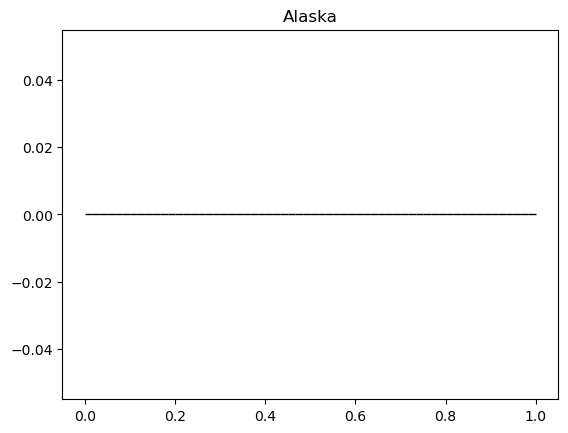

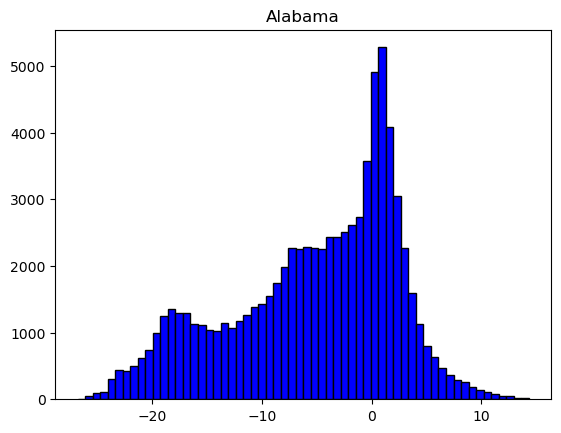

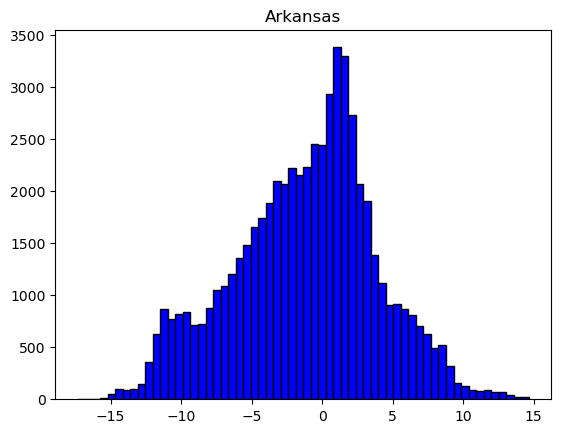

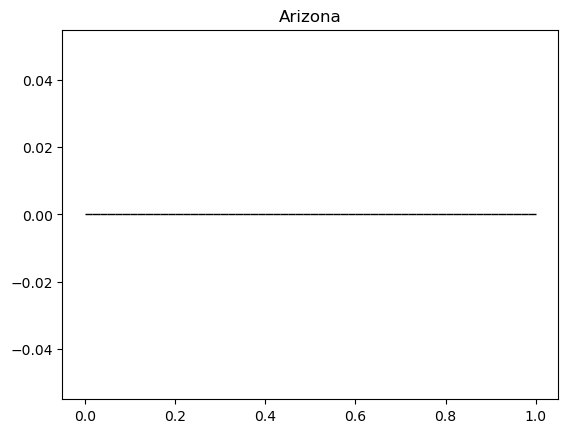

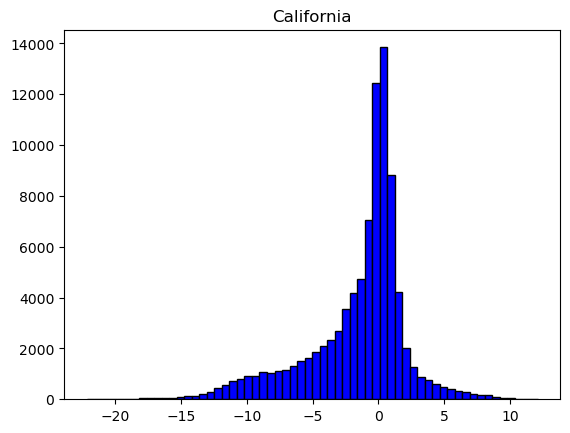

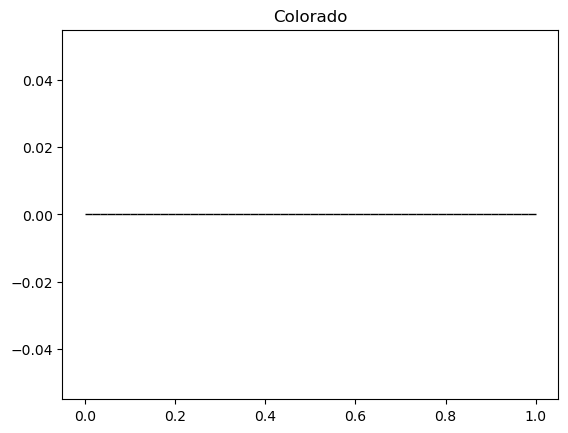

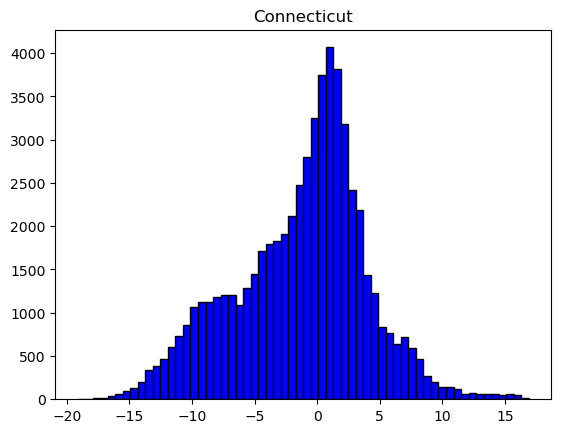

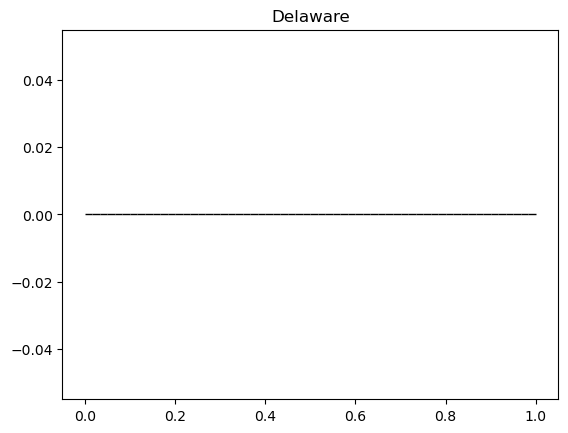

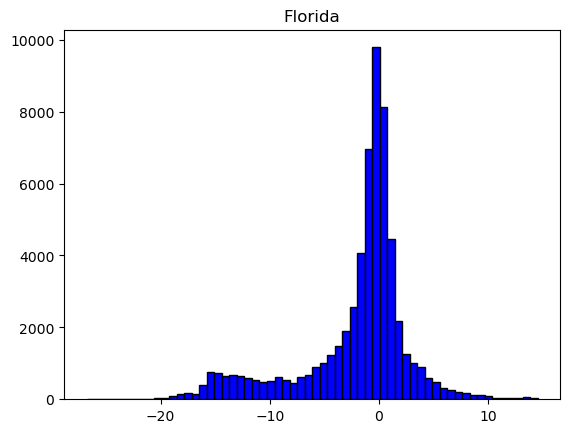

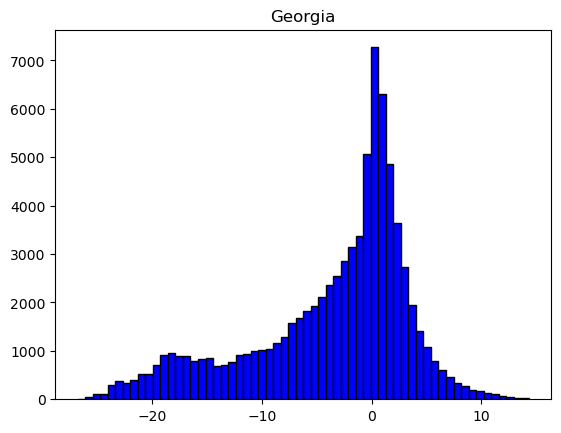

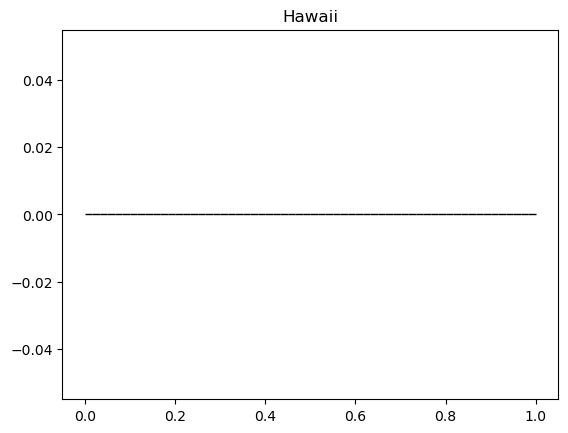

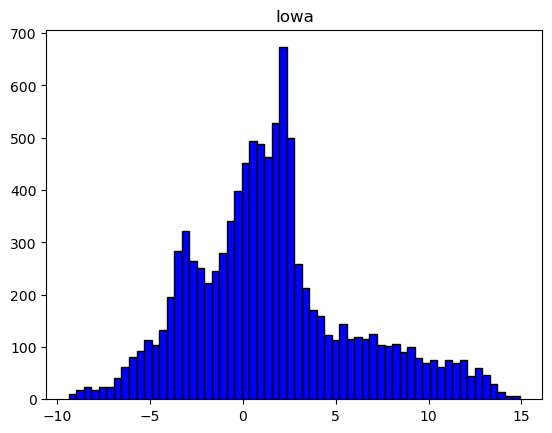

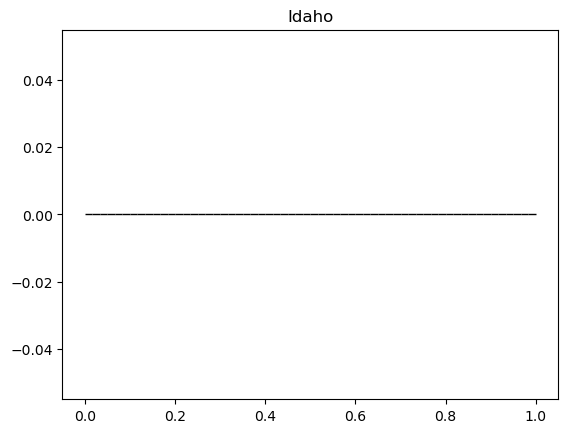

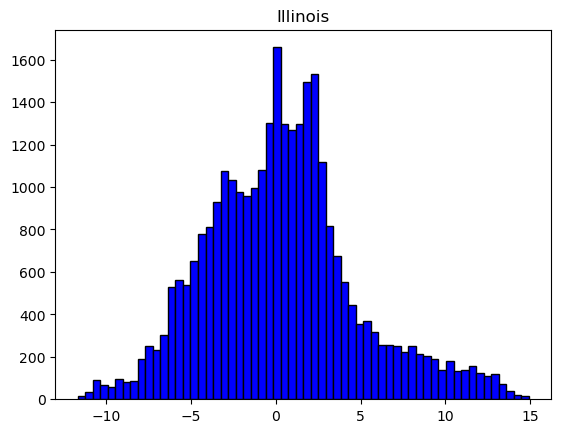

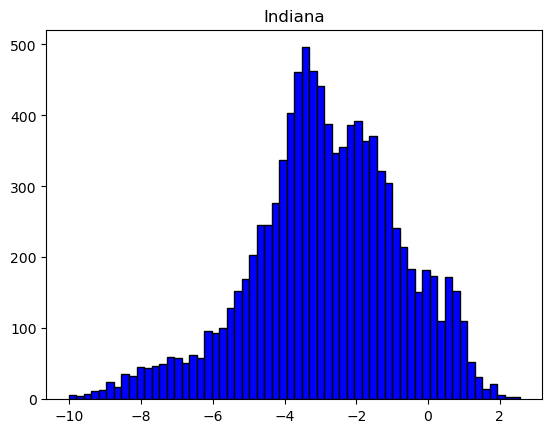

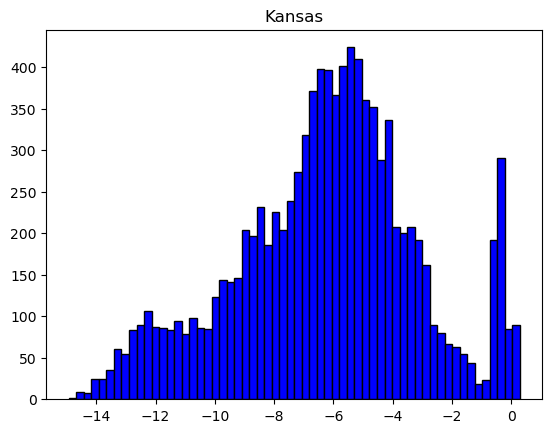

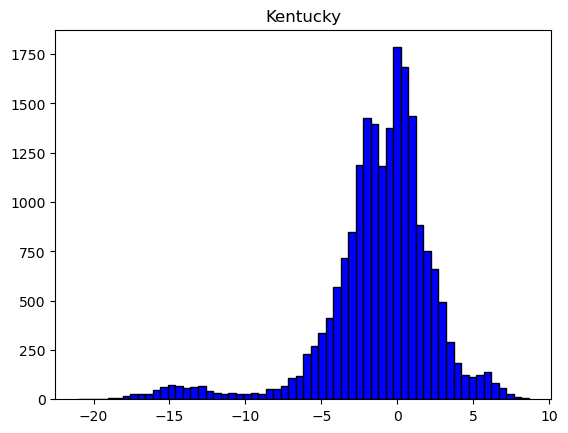

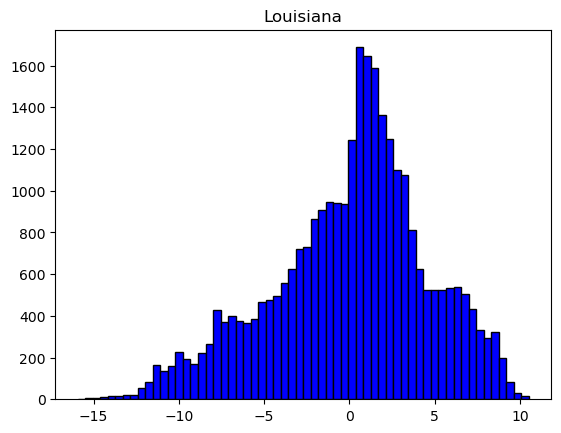

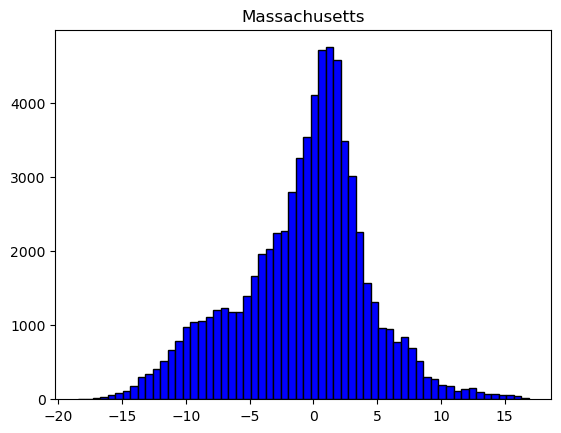

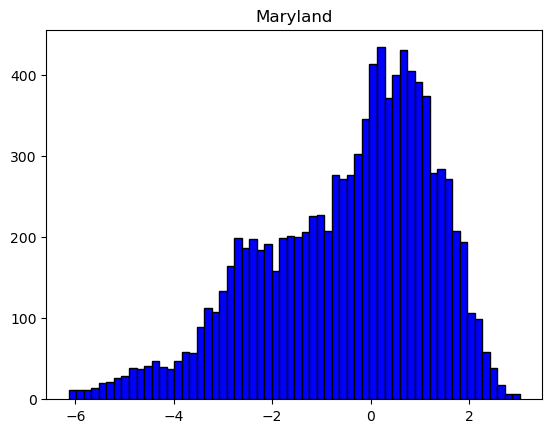

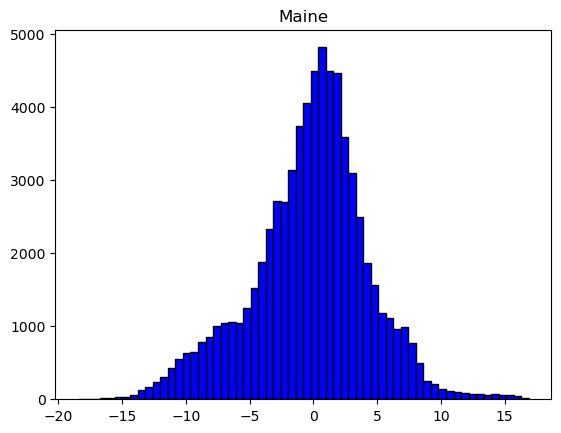

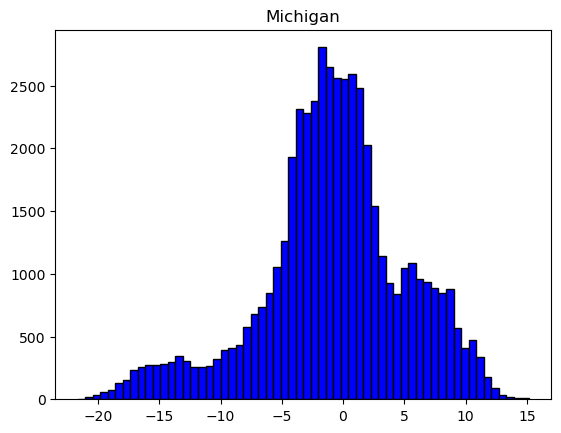

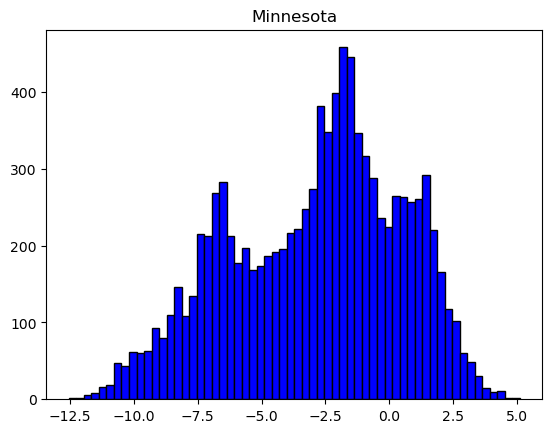

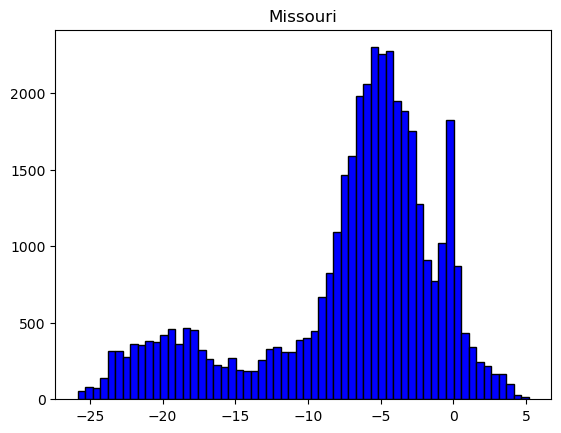

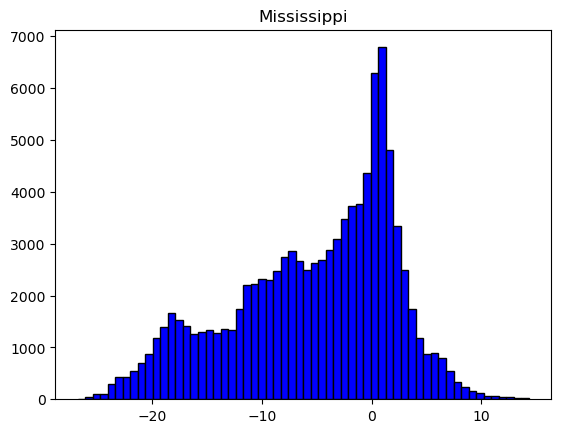

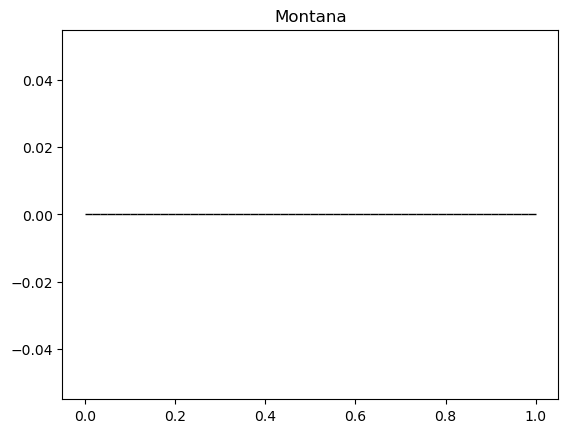

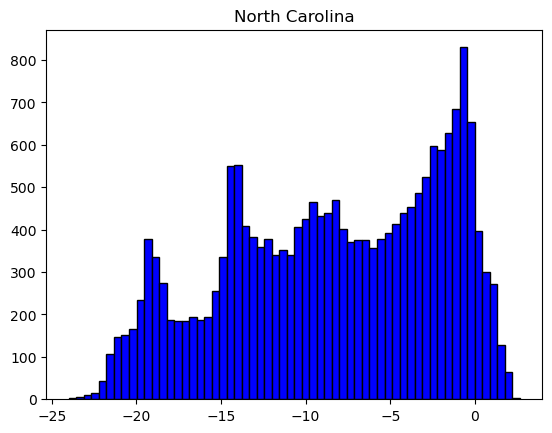

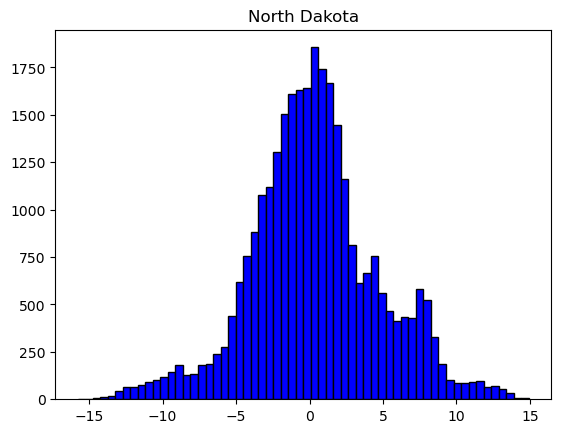

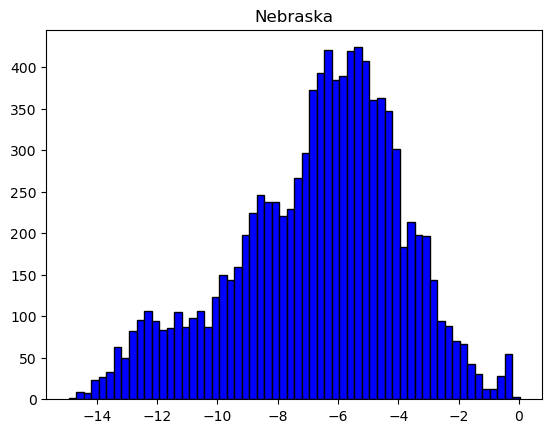

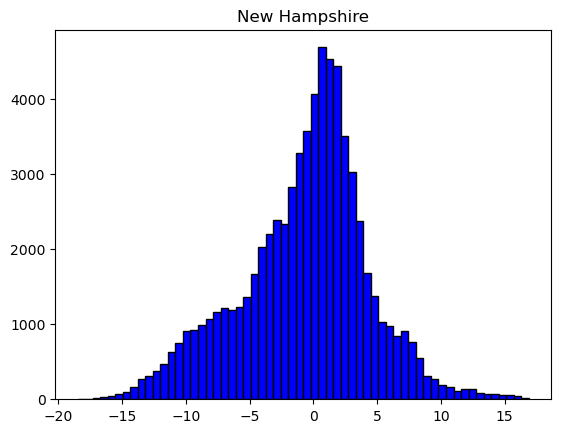

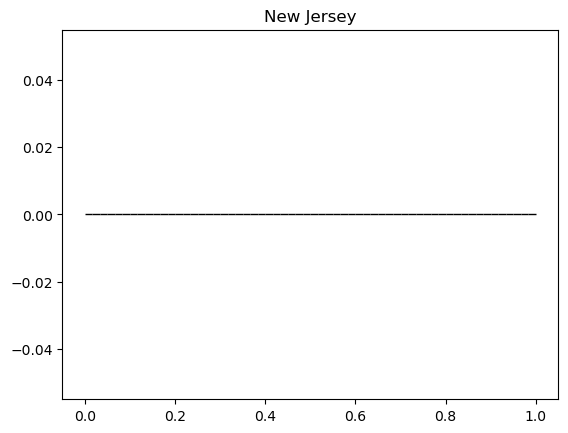

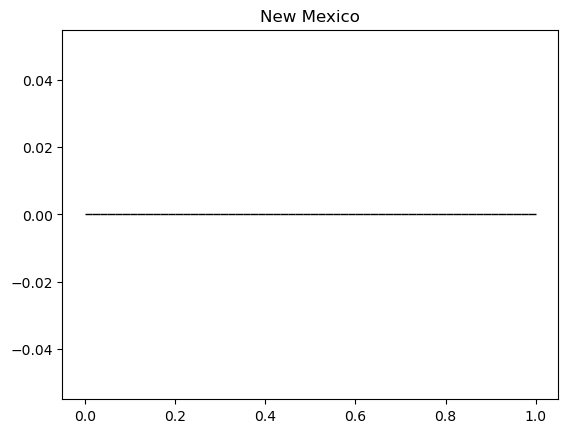

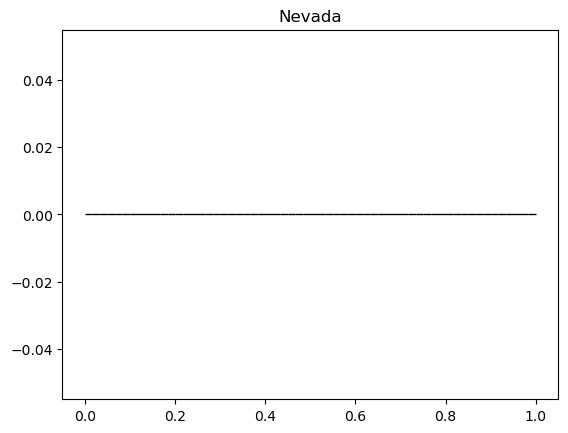

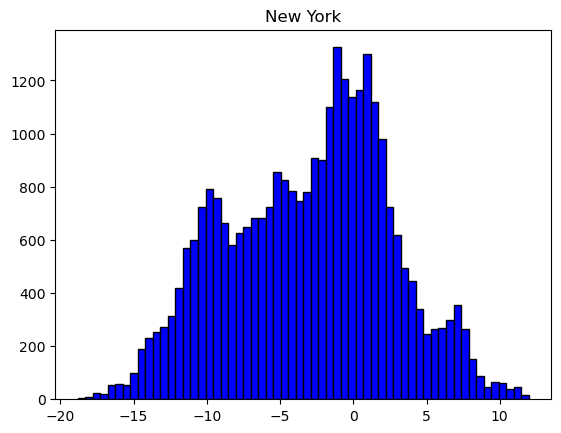

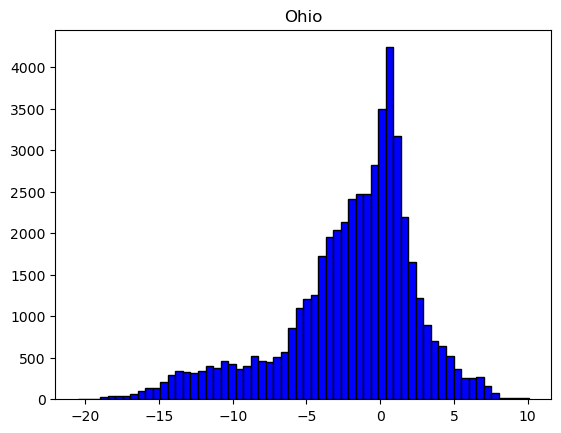

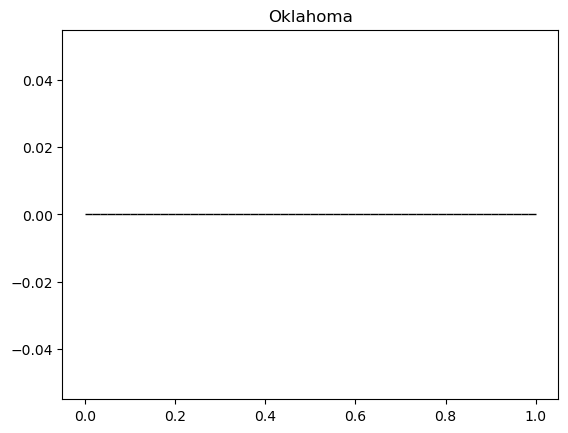

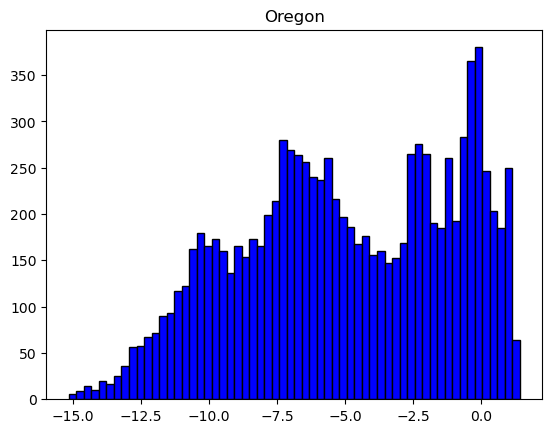

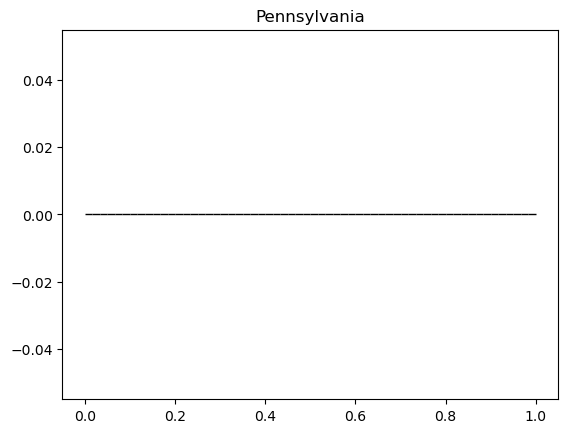

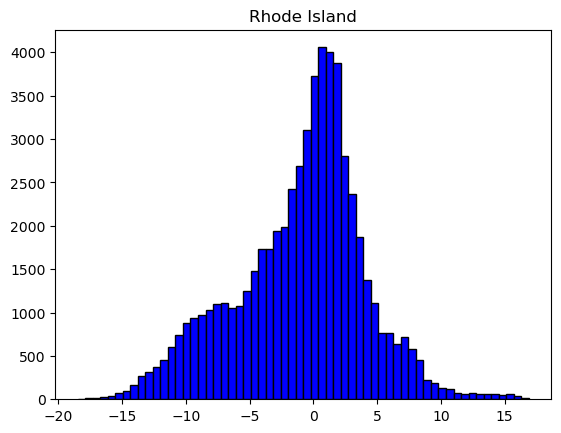

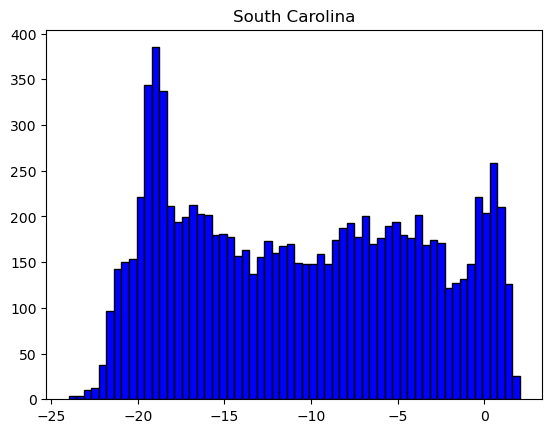

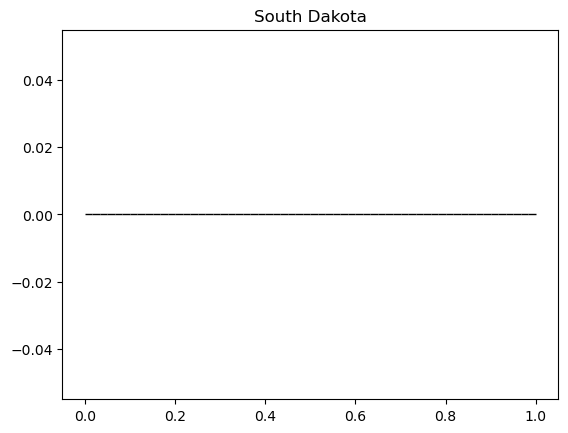

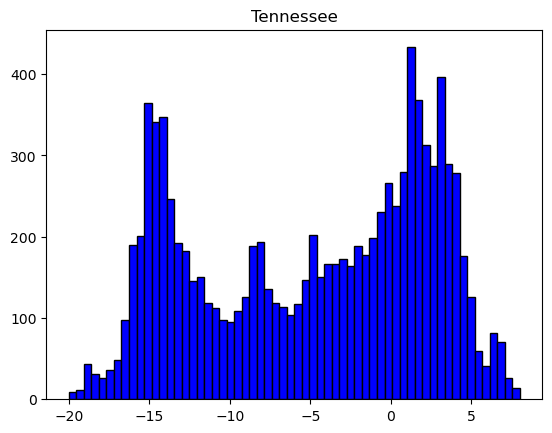

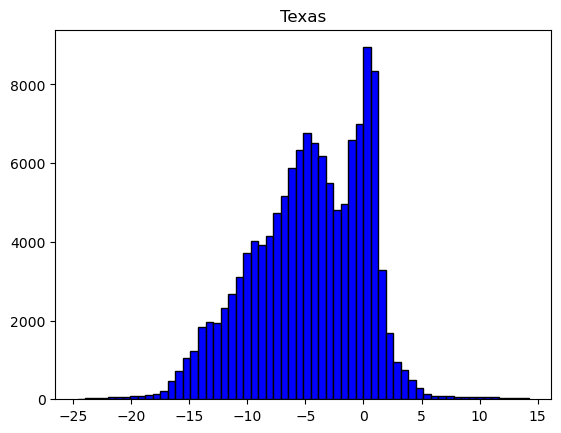

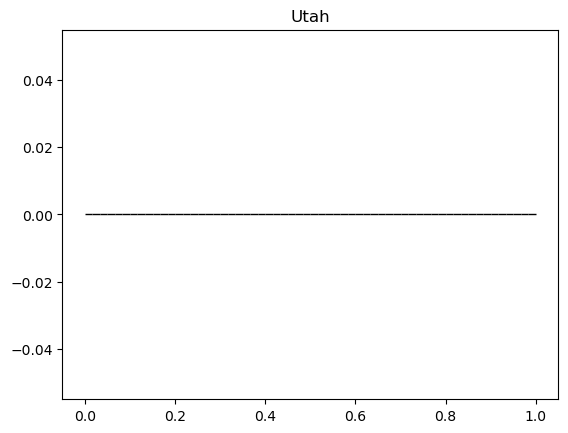

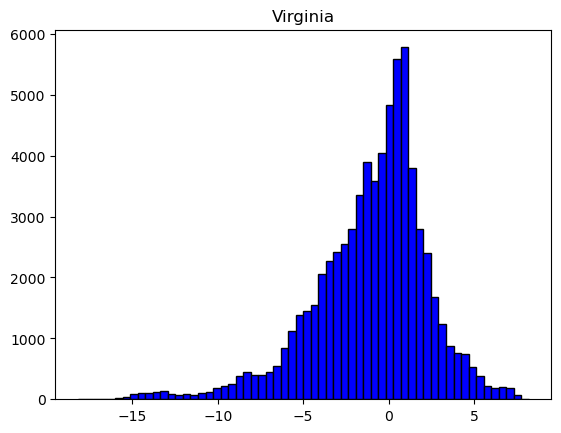

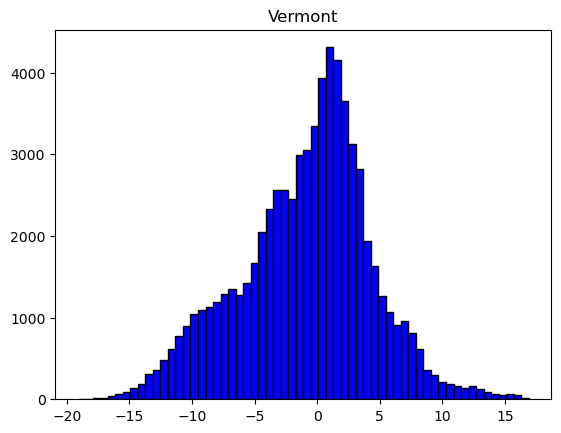

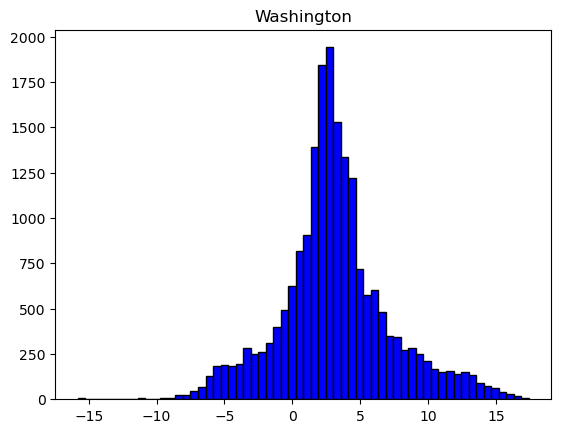

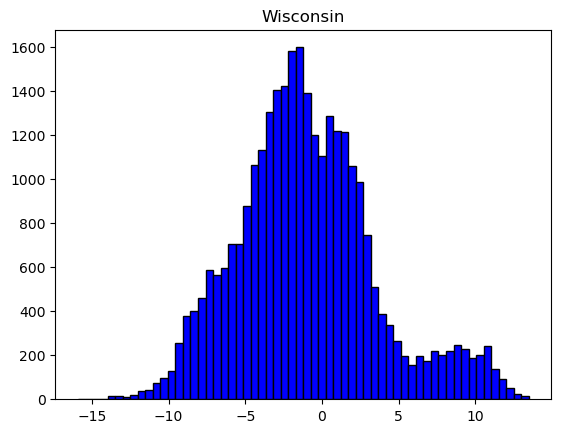

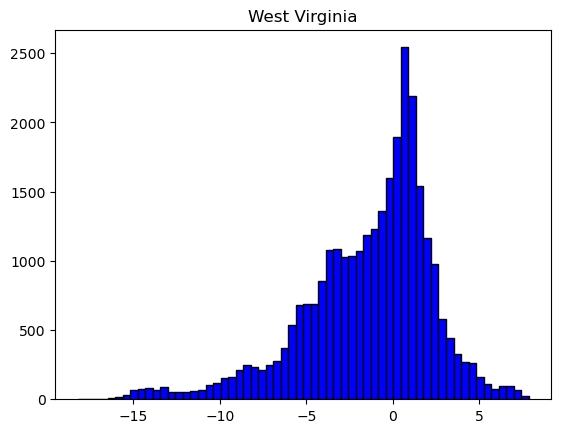

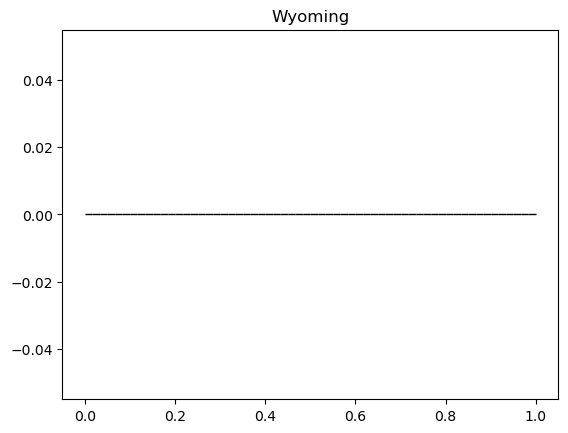

In [86]:
for i in range(len(states)):
    plt.figure()
    plt.title(states[i])
    plt.hist(state_anoms[i], color='blue', edgecolor ='black', bins=60)

In [7]:

start = True
state_sf_anoms = []
for state in states:
    anom_total = []
    for i in state_dict[state]:
        means = xr.open_dataset('../../a/state_means/global_mean.nc')

        file_name = i['Month'] + '-' + i['Day'] + '-' + i['Year'] + '.nc'
        x = xr.open_dataset('../datafiles/' + file_name)
        currLocation = i['Location']
        datetime = i['Year'] + '-' + i['Month'] + '-' + i['Day'] + 'T12:00:00'

        # print(i['Year'] + '-' + i['Month'] + '-' + i['Day'])

        

        # print(state_mean.time)

        lat = currLocation.geometry.y.values[0]
        lon = currLocation.geometry.x.values[0] + 360.
        # print(lat,lon)
        # print(means)
        # print(x)
        state_mean = means.sel(latitude=slice(lat+12.5,lat-12.5), longitude=slice(lon-12.5,lon+12.5),time=i['Year'] + '-' + i['Month'] + '-01')
        locate =  x.sel(latitude=slice(lat+12.5,lat-12.5), longitude=slice(lon-12.5,lon+12.5), time=datetime)

        # state_mean.t2m.plot()

        print(state_mean)

        # print(state_mean.t2m.to_numpy())
        # print(locate.t2m.to_numpy())


        anom = locate.sf.to_numpy() - state_mean.sf.to_numpy()

        if start:
            start = False
            anom_total = anom.flatten()
        else:
            anom_total = np.hstack((anom_total,anom.flatten()))
    state_sf_anoms.append(anom_total)

    
    


<xarray.Dataset>
Dimensions:    (longitude: 100, latitude: 100)
Coordinates:
  * longitude  (longitude) float32 260.8 261.0 261.2 261.5 ... 285.0 285.2 285.5
  * latitude   (latitude) float32 45.75 45.5 45.25 45.0 ... 21.5 21.25 21.0
    time       datetime64[ns] 2022-01-01
Data variables:
    u10        (latitude, longitude) float32 ...
    v10        (latitude, longitude) float32 ...
    t2m        (latitude, longitude) float32 ...
    i10fg      (latitude, longitude) float32 ...
    msl        (latitude, longitude) float32 ...
    sp         (latitude, longitude) float32 ...
    tp         (latitude, longitude) float32 ...
    sf         (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-03-01 19:07:56 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...
<xarray.Dataset>
Dimensions:    (longitude: 100, latitude: 100)
Coordinates:
  * longitude  (longitude) float32 260.8 261.0 261.2 261.5 ... 285.0 285.2 285.5
  * latitude   (latitude) float32 45.75 4

/tmp/ipykernel_165047/248233972.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


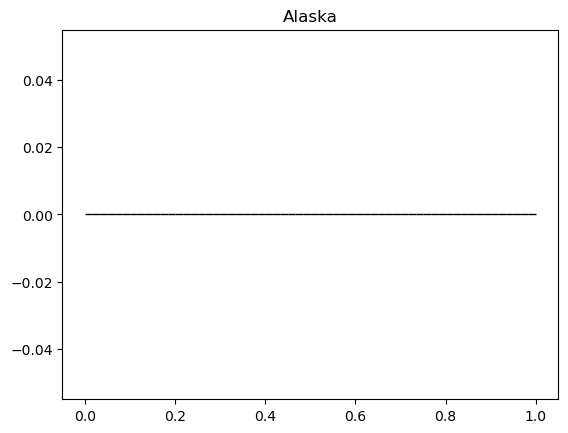

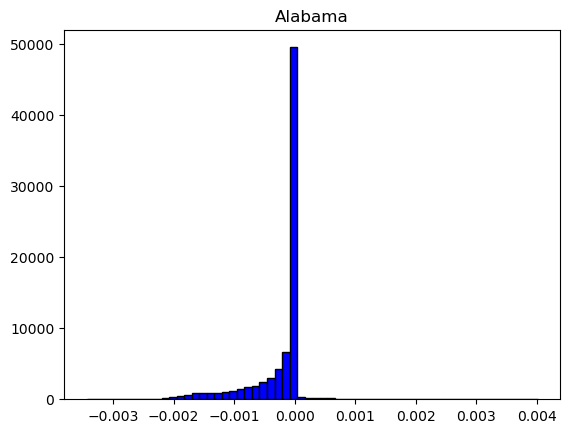

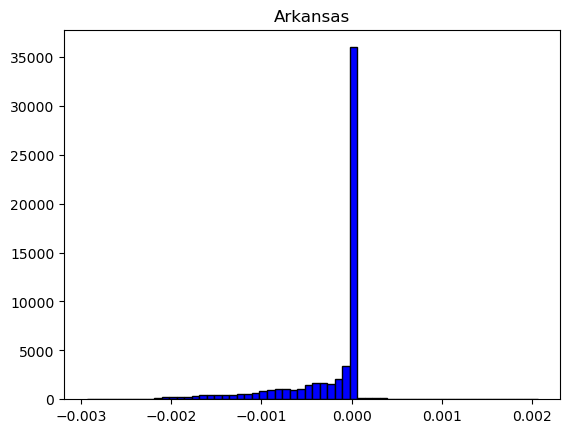

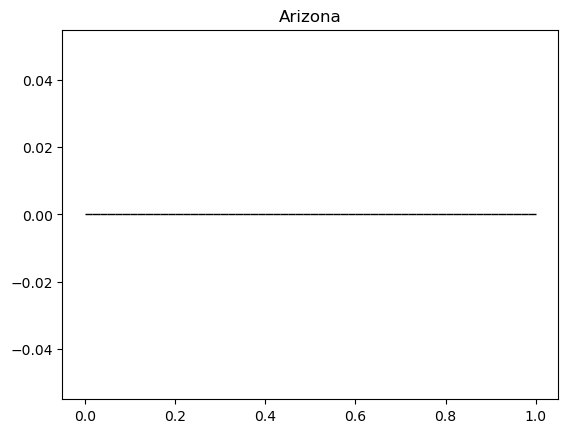

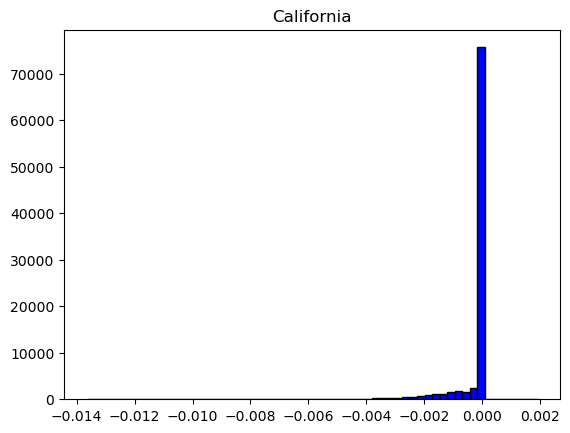

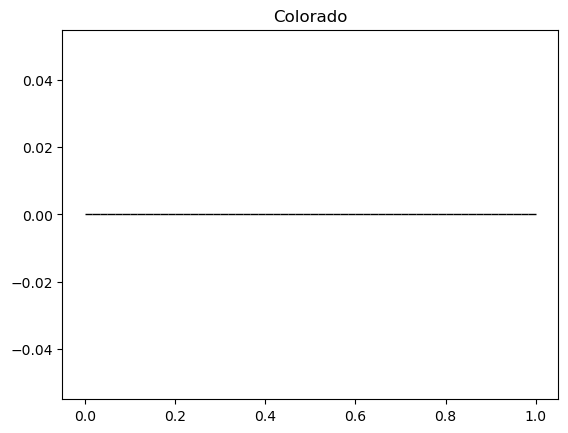

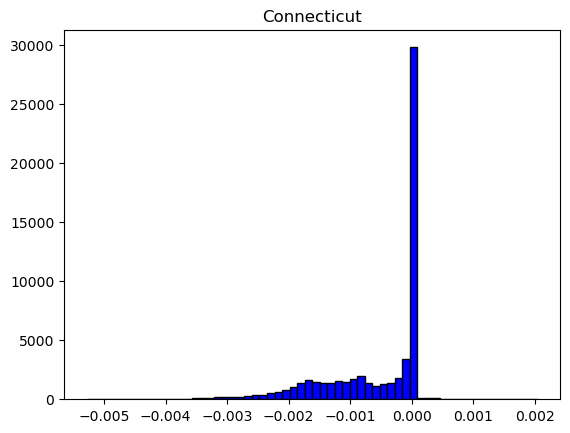

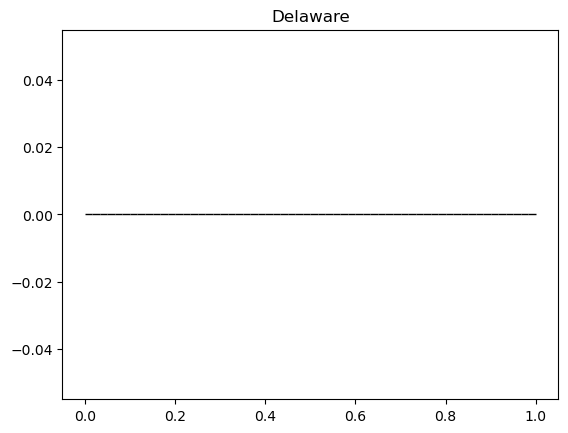

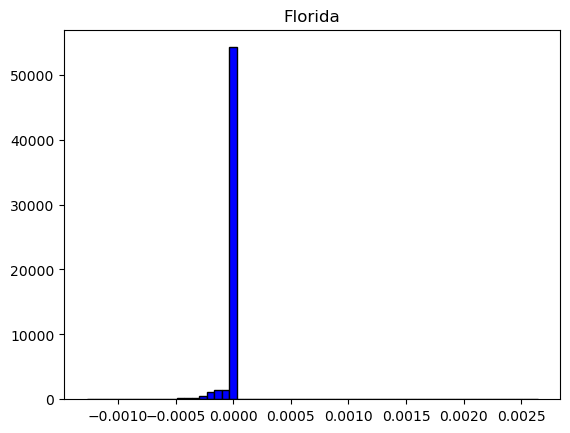

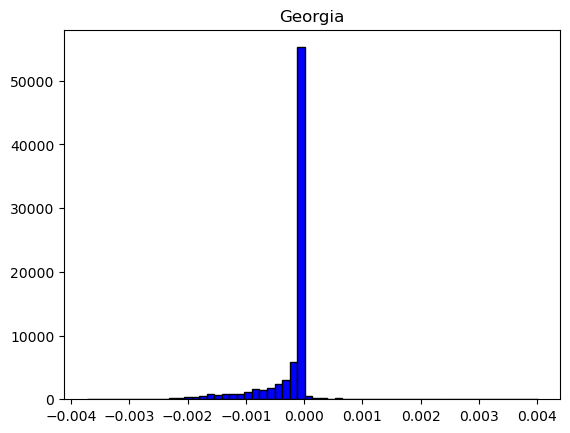

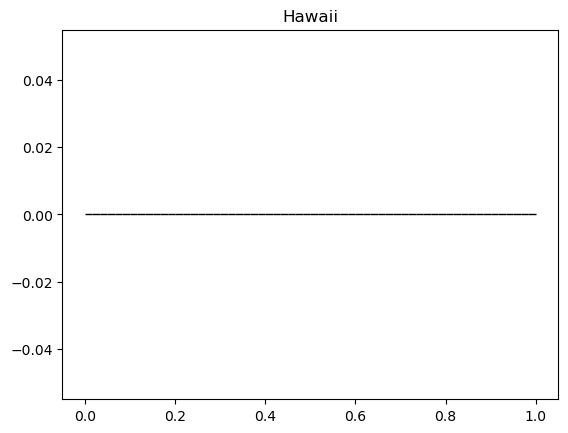

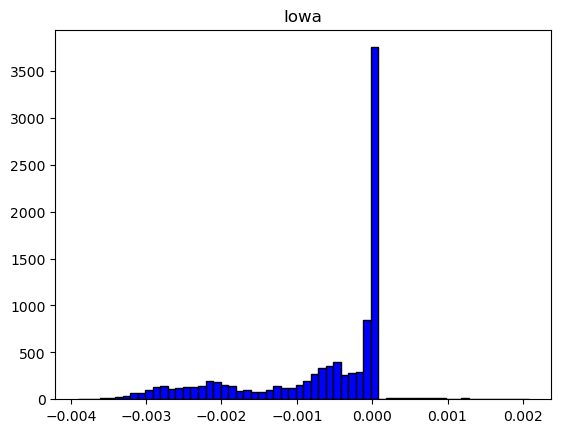

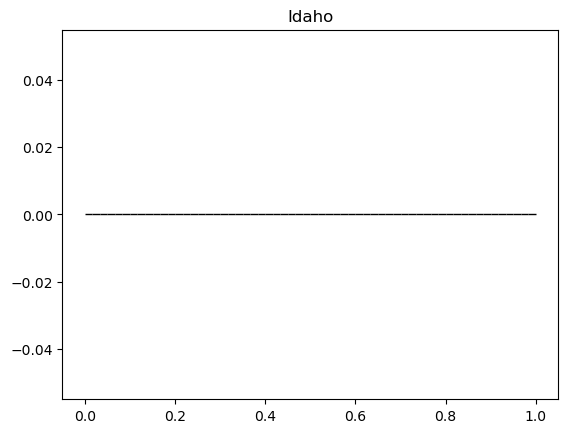

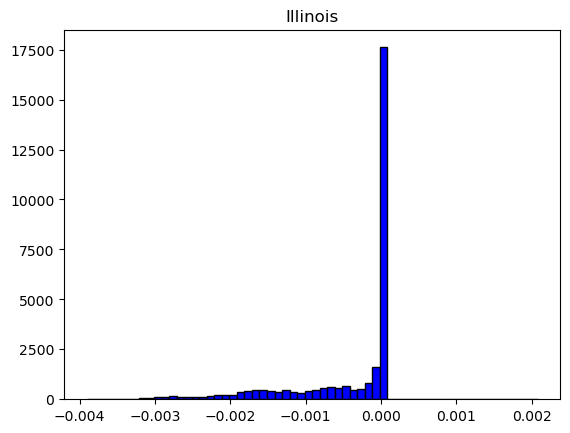

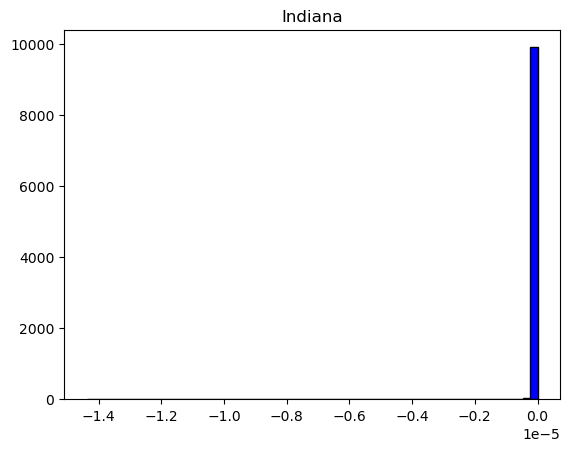

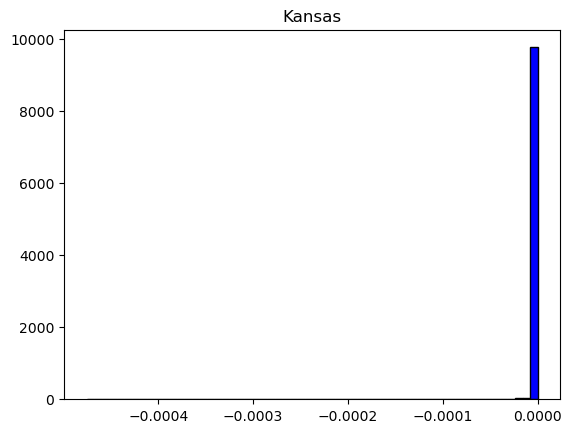

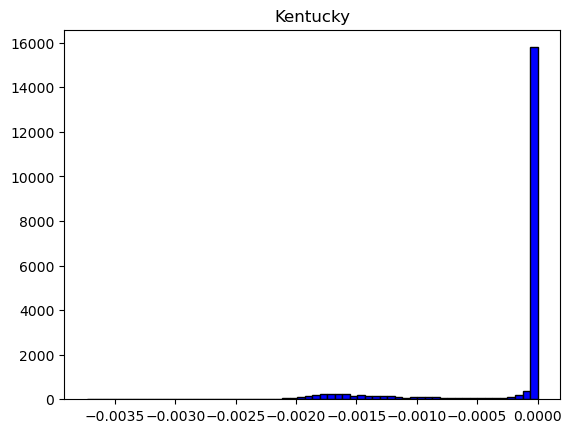

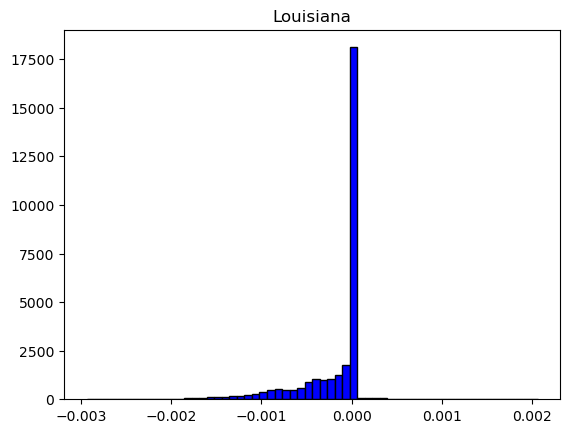

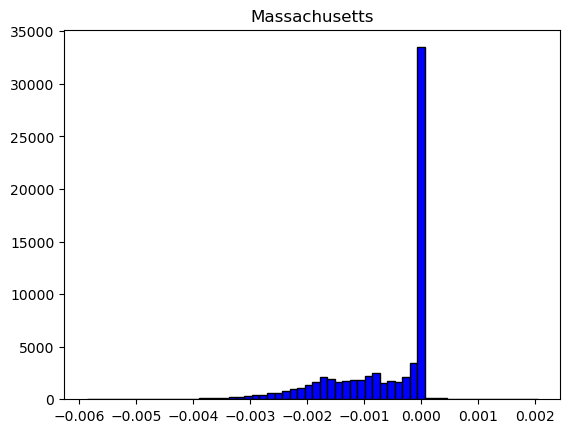

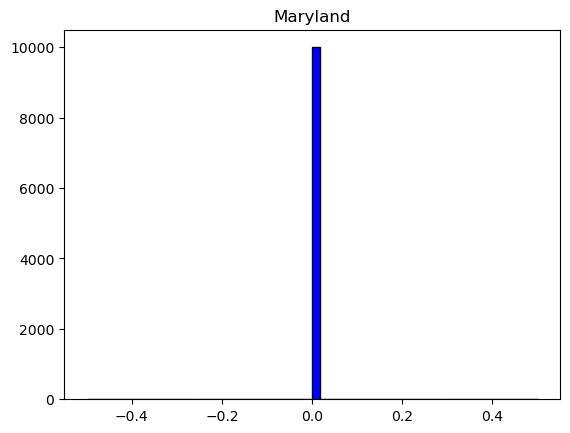

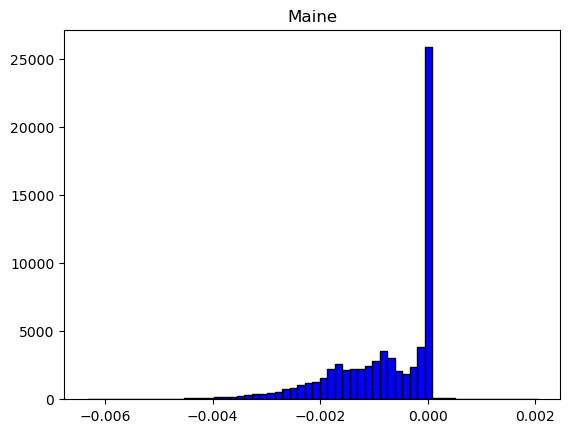

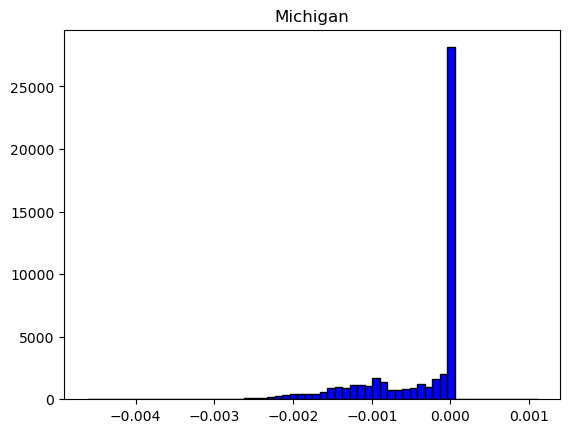

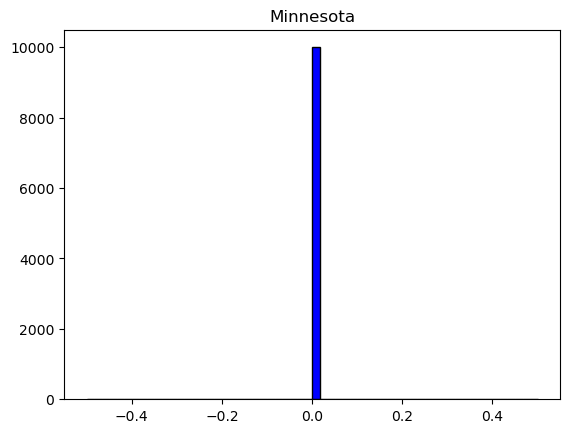

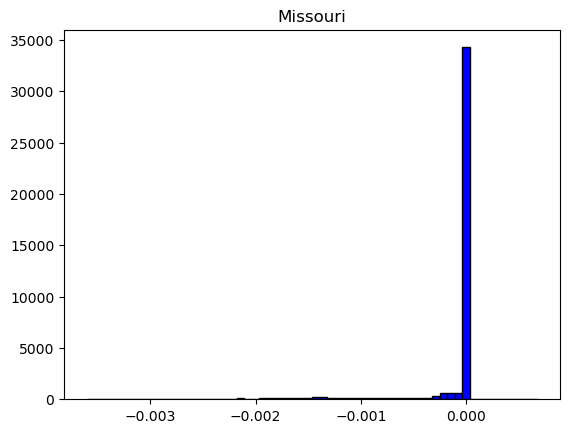

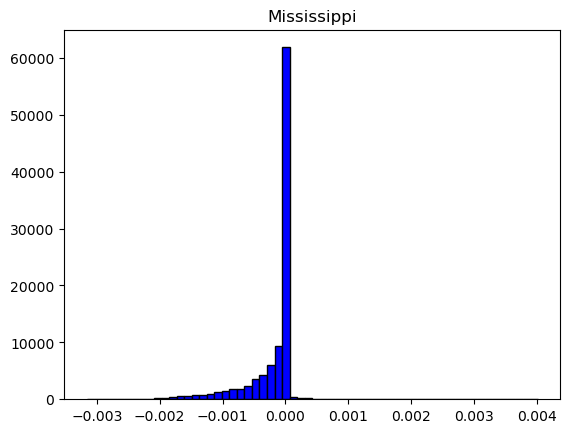

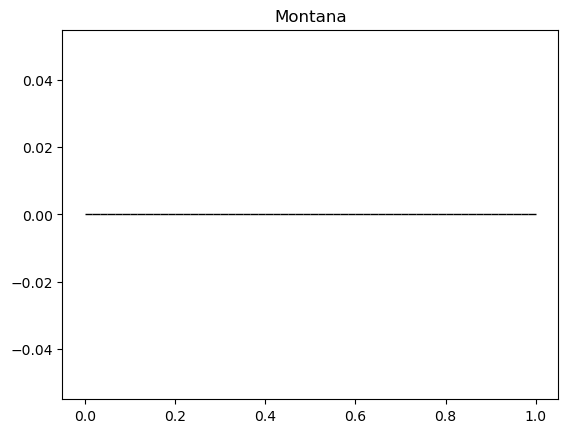

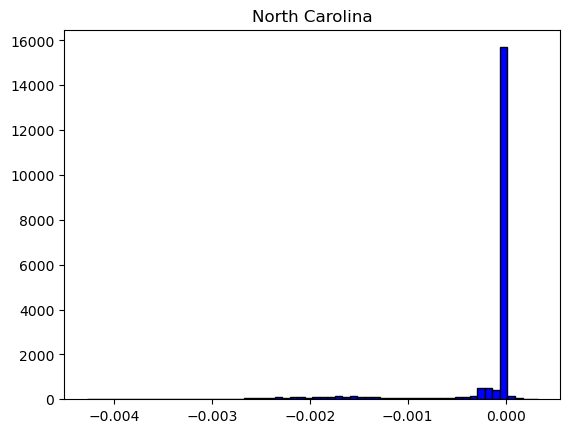

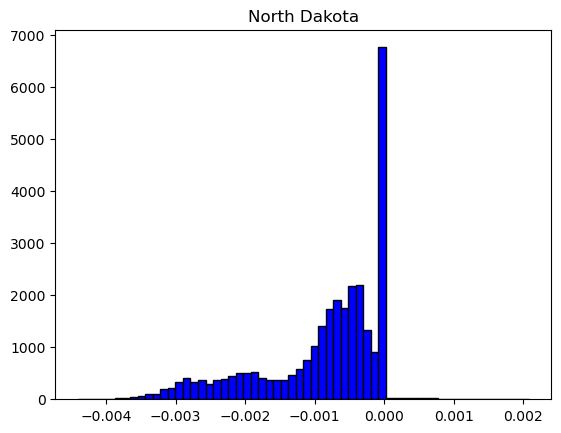

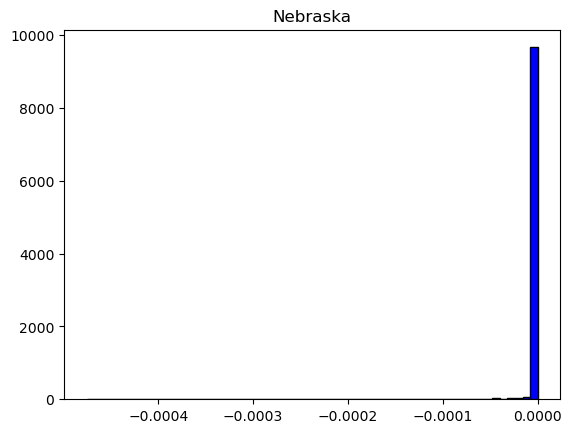

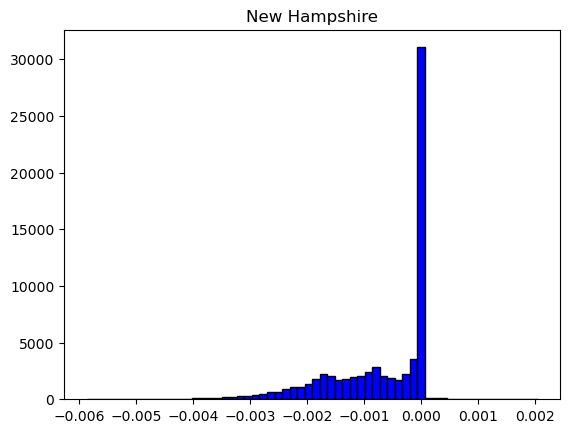

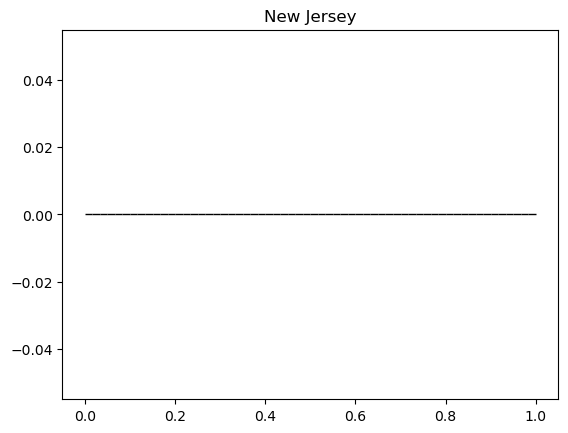

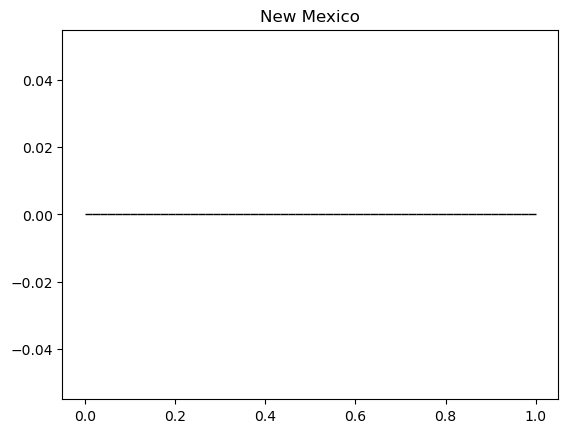

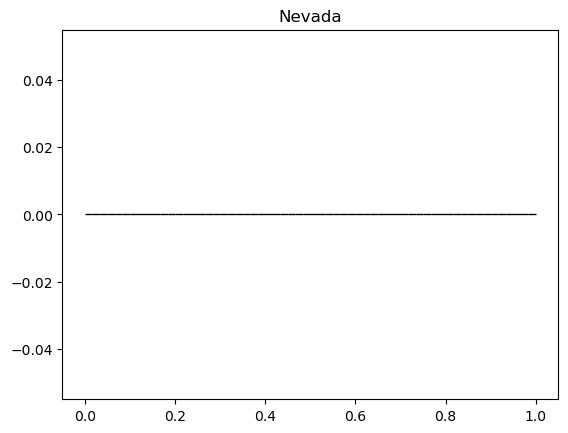

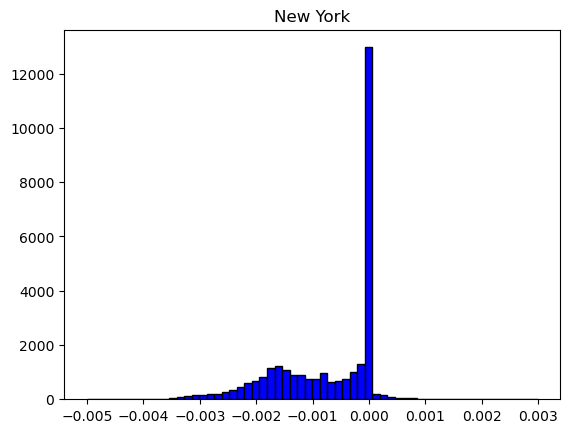

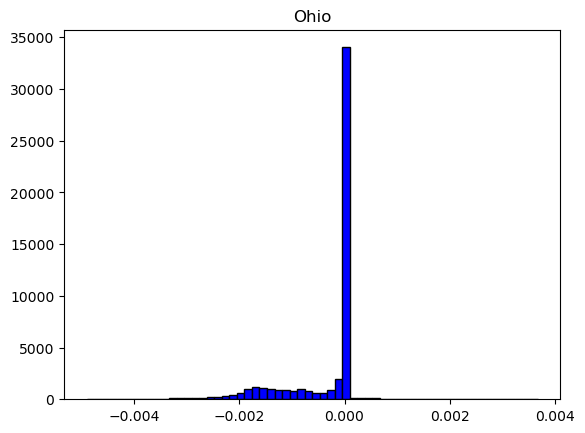

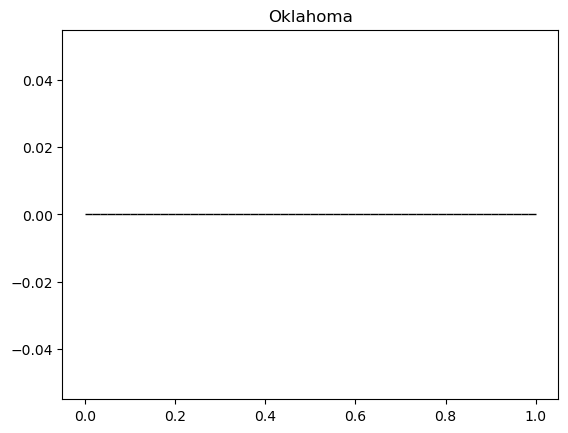

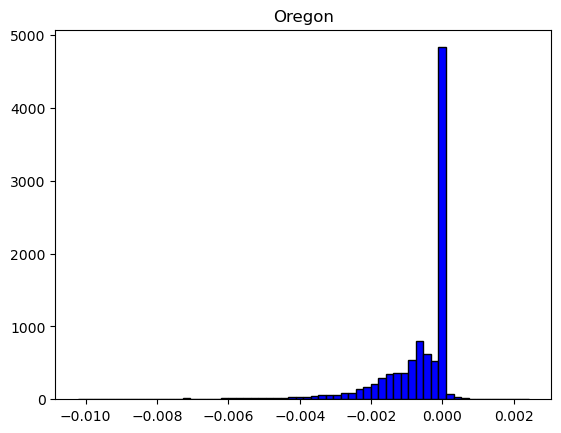

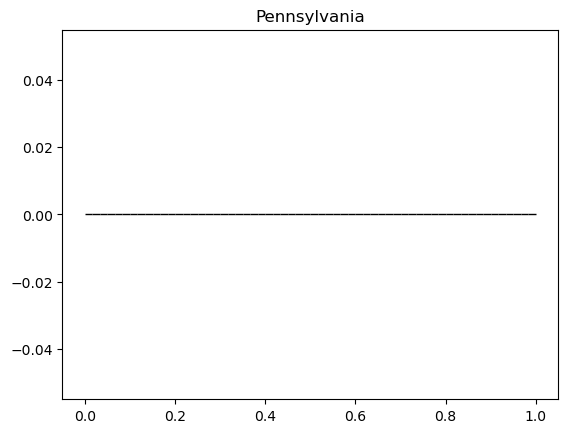

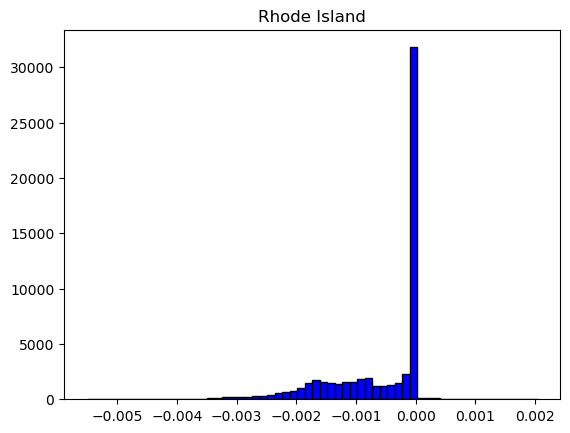

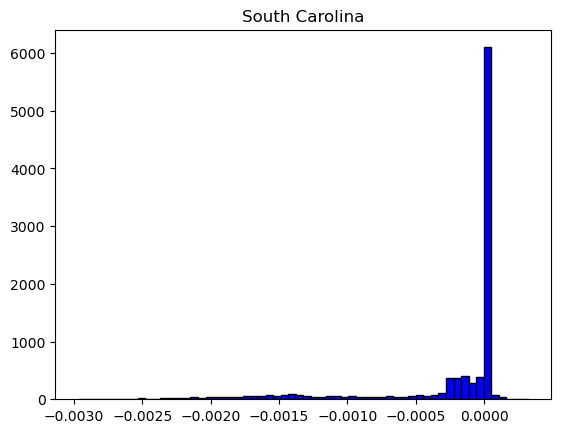

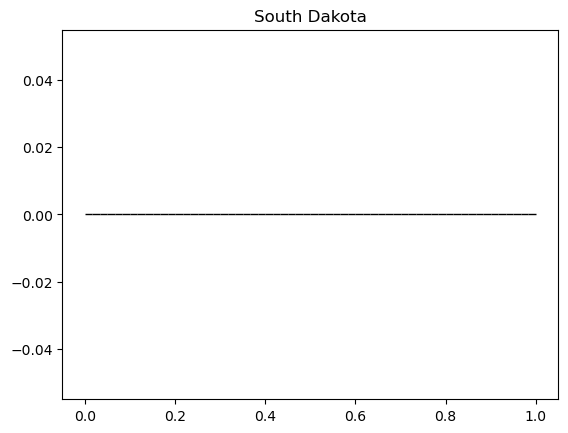

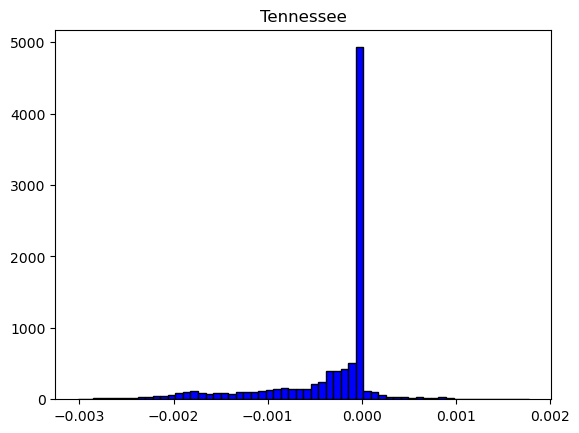

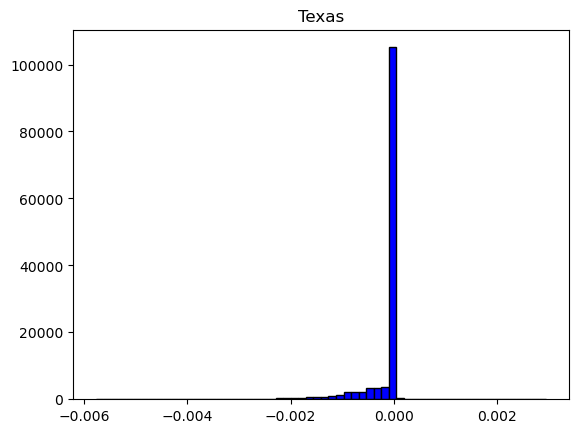

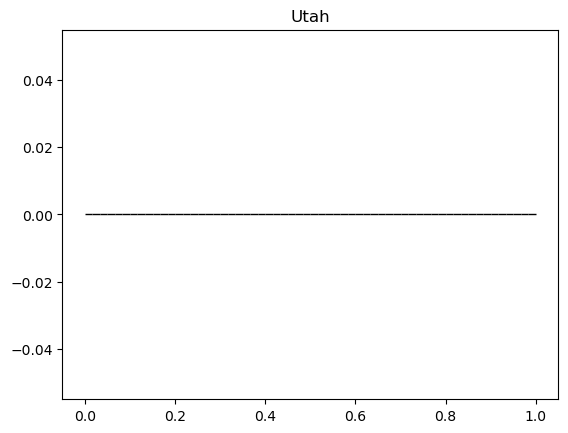

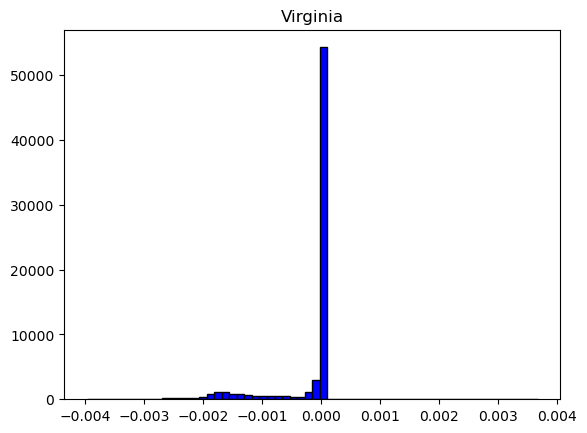

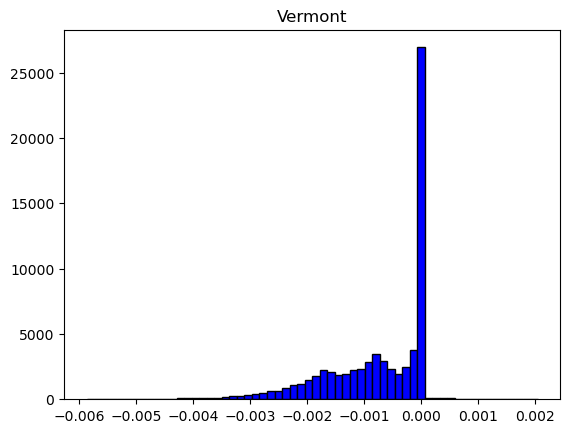

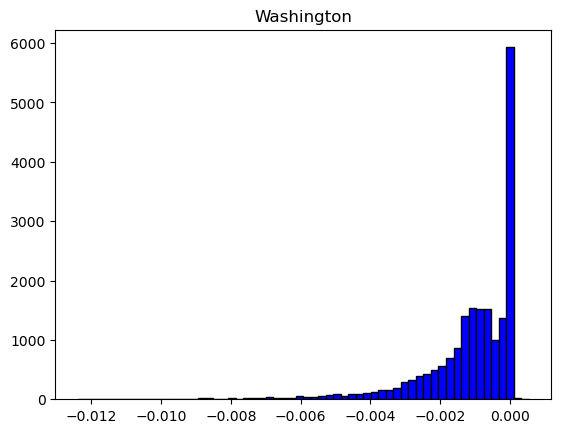

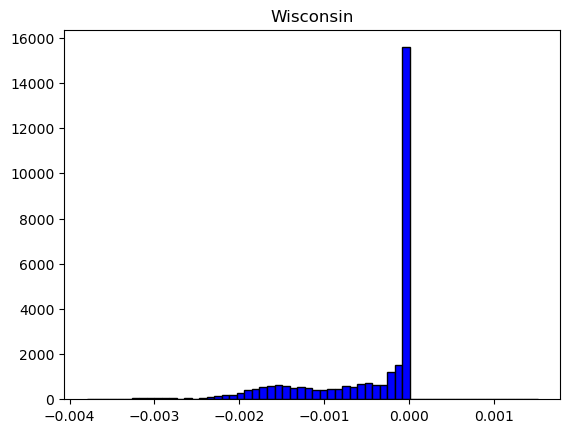

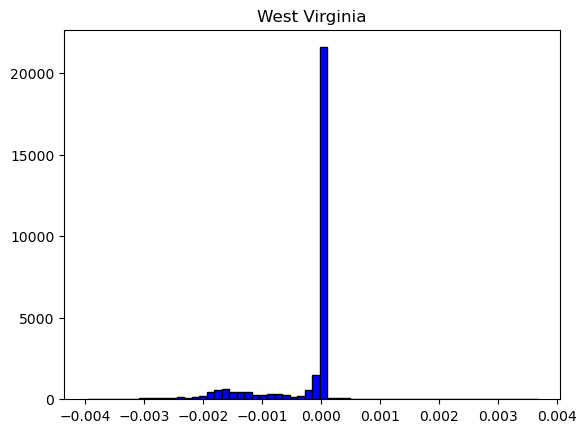

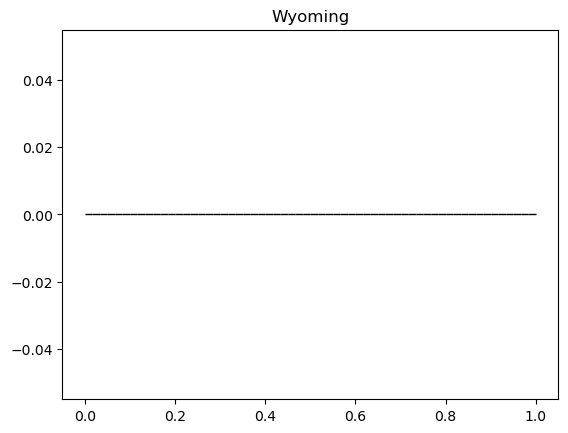

In [8]:
for i in range(len(states)):
    plt.figure()
    plt.title(states[i])
    plt.hist(state_sf_anoms[i], color='blue', edgecolor ='black', bins=60)

In [93]:

start = True
state_wind_anoms = []
for state in states:
    anom_total = []
    for i in state_dict[state]:
        means = xr.open_dataset('../../a/state_means/global_mean.nc')

        file_name = i['Month'] + '-' + i['Day'] + '-' + i['Year'] + '.nc'
        x = xr.open_dataset('../datafiles/' + file_name)
        currLocation = i['Location']
        datetime = i['Year'] + '-' + i['Month'] + '-' + i['Day'] + 'T12:00:00'

        # print(i['Year'] + '-' + i['Month'] + '-' + i['Day'])

        

        # print(state_mean.time)

        lat = currLocation.geometry.y.values[0]
        lon = currLocation.geometry.x.values[0] + 360.
        # print(lat,lon)
        # print(means)
        # print(x)
        state_mean = means.sel(latitude=slice(lat+12.5,lat-12.5), longitude=slice(lon-12.5,lon+12.5),time=i['Year'] + '-' + i['Month'] + '-01')
        locate =  x.sel(latitude=slice(lat+12.5,lat-12.5), longitude=slice(lon-12.5,lon+12.5), time=datetime)

        # state_mean.t2m.plot()

        print(state_mean)

        # print(state_mean.t2m.to_numpy())
        # print(locate.t2m.to_numpy())


        wind_mag = np.sqrt(np.square(locate.u10.to_numpy())+np.square(locate.v10.to_numpy()))
        wind_mean = np.sqrt(np.square(state_mean.u10.to_numpy())+np.square(state_mean.v10.to_numpy()))

        anom = wind_mag - wind_mean

        if start:
            start = False
            anom_total = anom.flatten()
        else:
            anom_total = np.hstack((anom_total,anom.flatten()))
    state_wind_anoms.append(anom_total)

    
    


<xarray.Dataset>
Dimensions:    (longitude: 100, latitude: 100)
Coordinates:
  * longitude  (longitude) float32 260.8 261.0 261.2 261.5 ... 285.0 285.2 285.5
  * latitude   (latitude) float32 45.75 45.5 45.25 45.0 ... 21.5 21.25 21.0
    time       datetime64[ns] 2022-01-01
Data variables:
    u10        (latitude, longitude) float32 ...
    v10        (latitude, longitude) float32 ...
    t2m        (latitude, longitude) float32 ...
    i10fg      (latitude, longitude) float32 ...
    msl        (latitude, longitude) float32 ...
    sp         (latitude, longitude) float32 ...
    tp         (latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-03-01 04:06:31 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...
<xarray.Dataset>
Dimensions:    (longitude: 100, latitude: 100)
Coordinates:
  * longitude  (longitude) float32 260.8 261.0 261.2 261.5 ... 285.0 285.2 285.5
  * latitude   (latitude) float32 45.75 45.5 45.25 45.0 ... 21.5 21.25 21.0
    time      

/tmp/ipykernel_186560/346299654.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


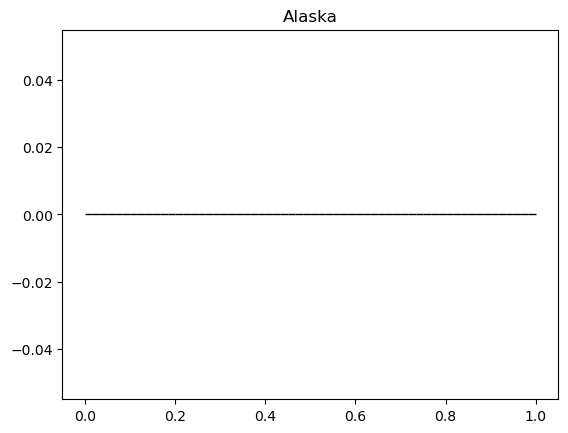

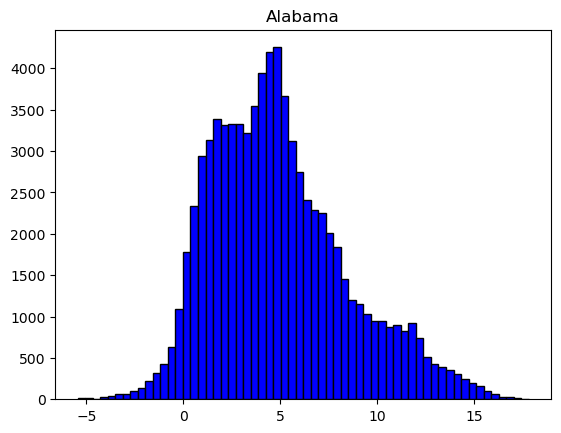

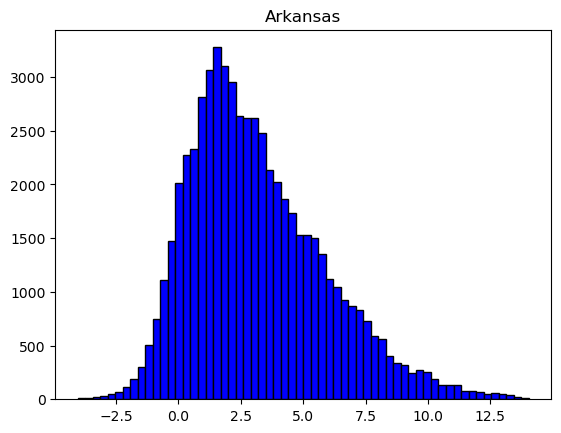

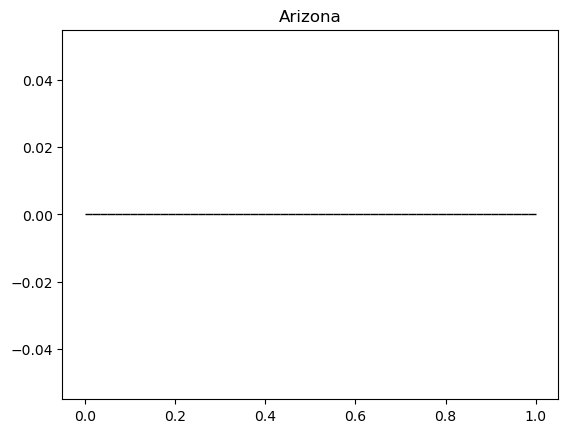

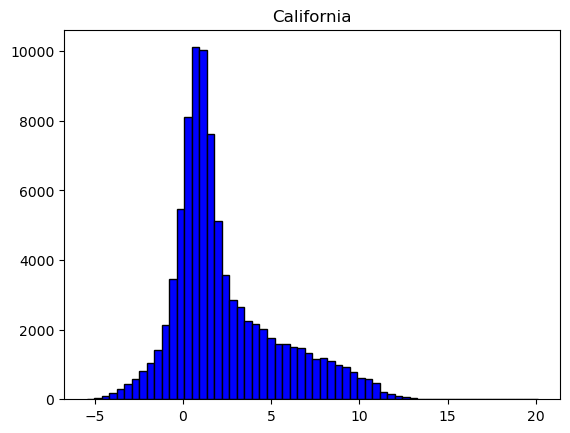

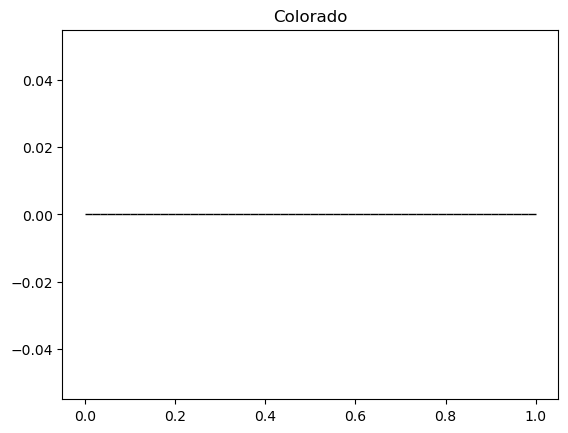

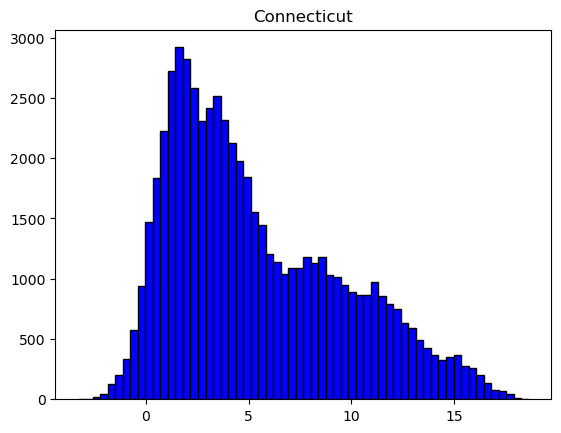

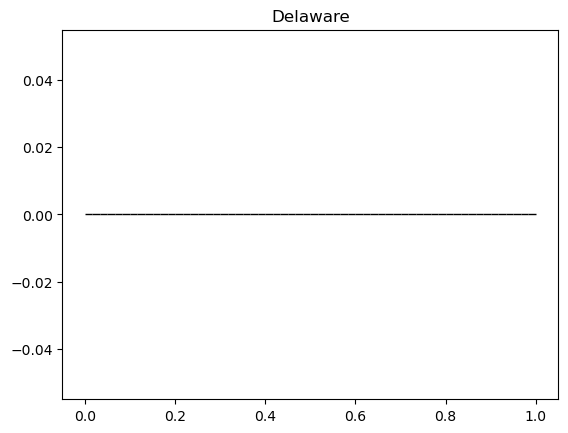

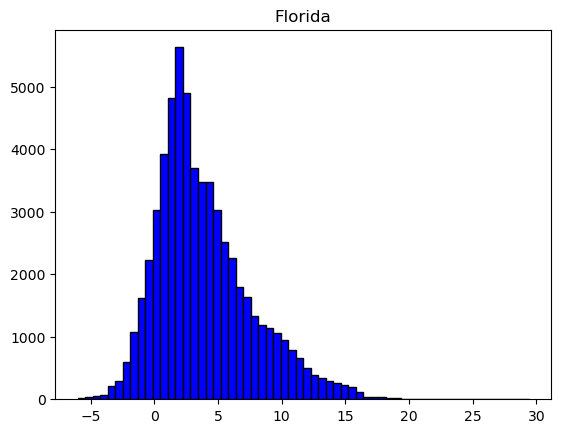

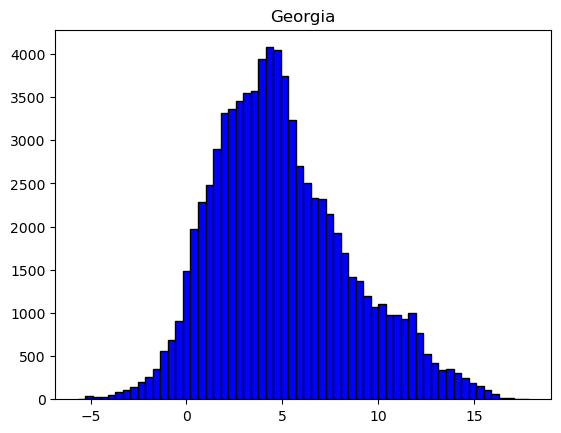

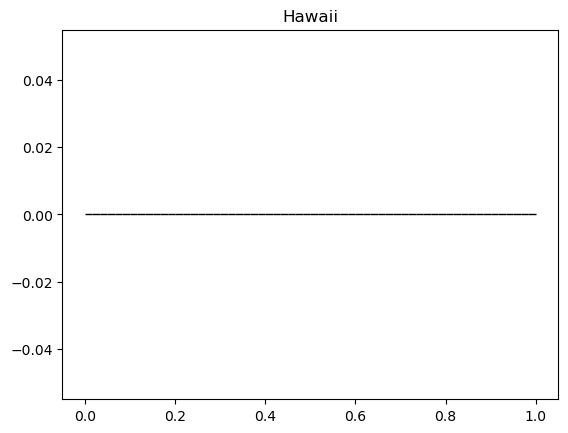

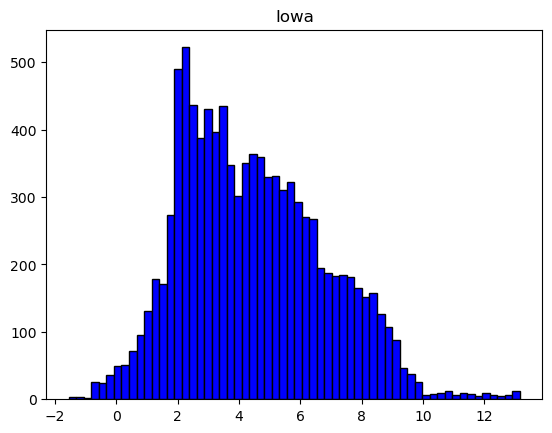

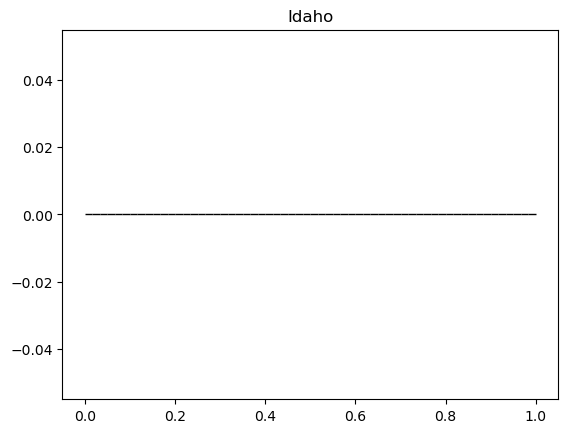

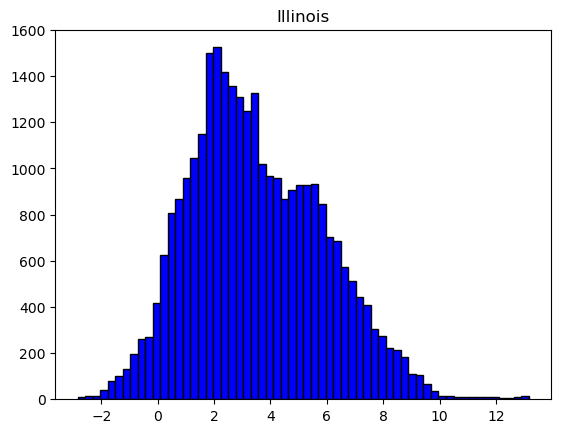

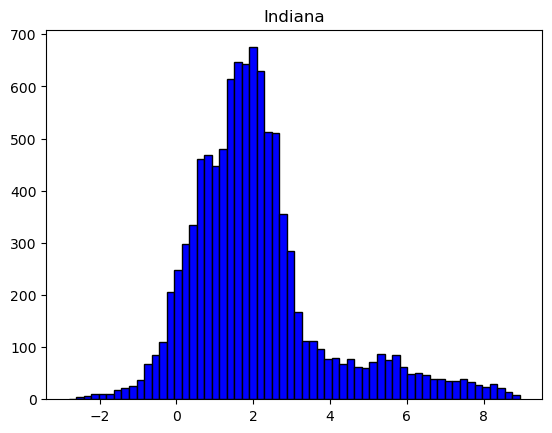

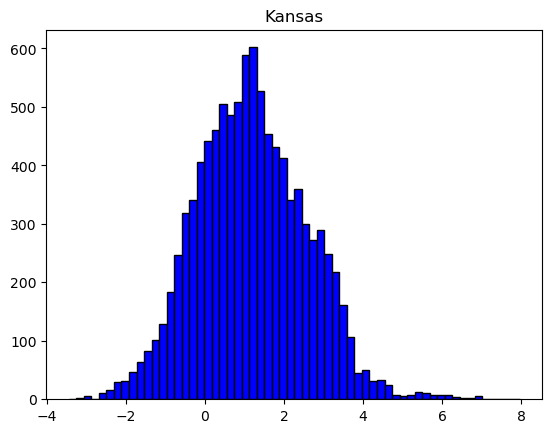

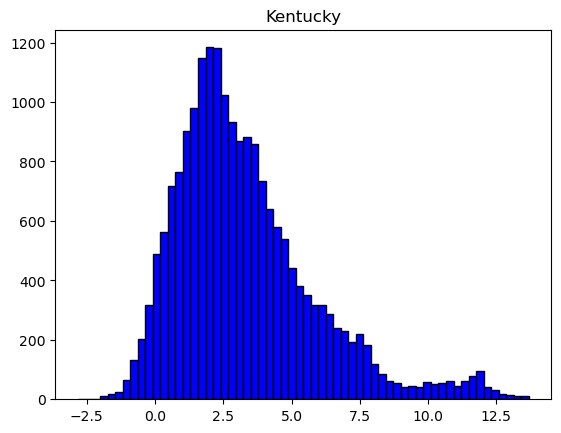

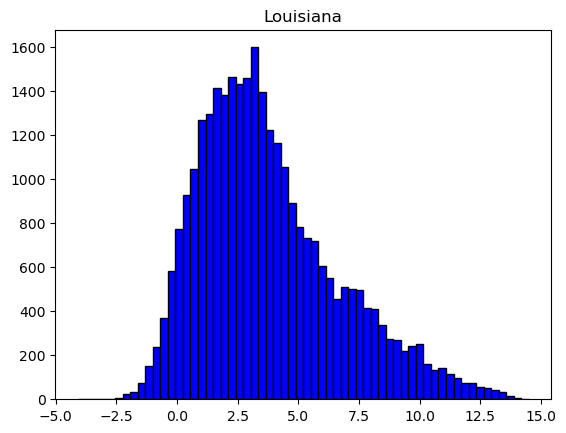

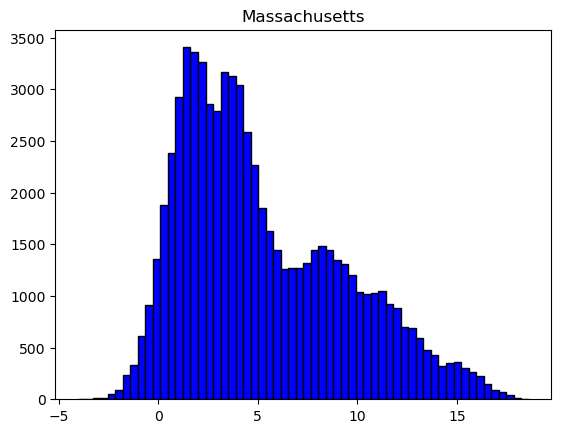

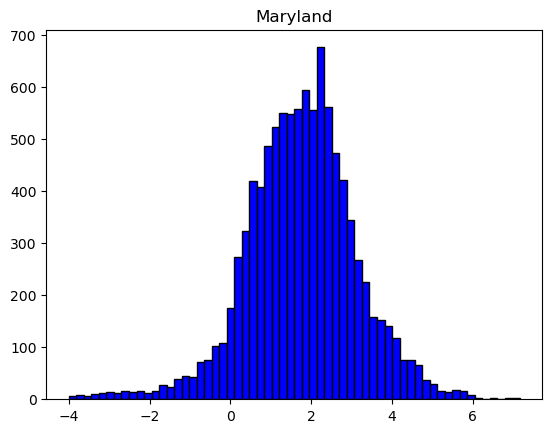

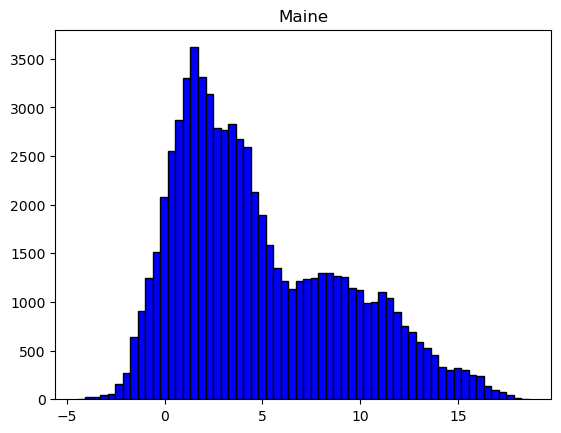

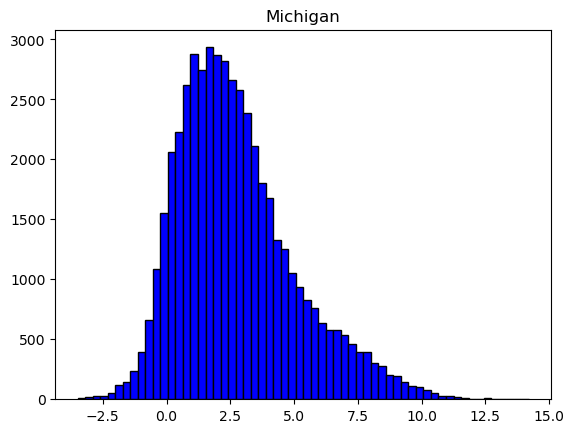

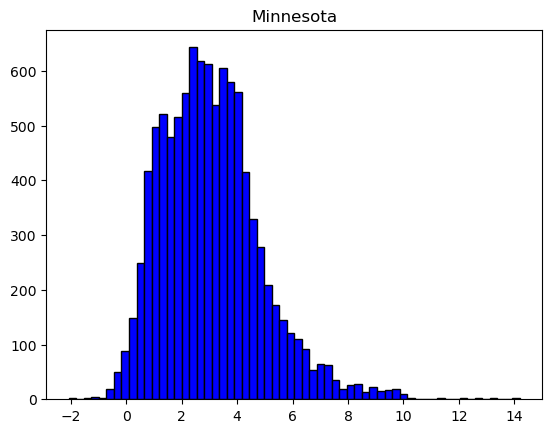

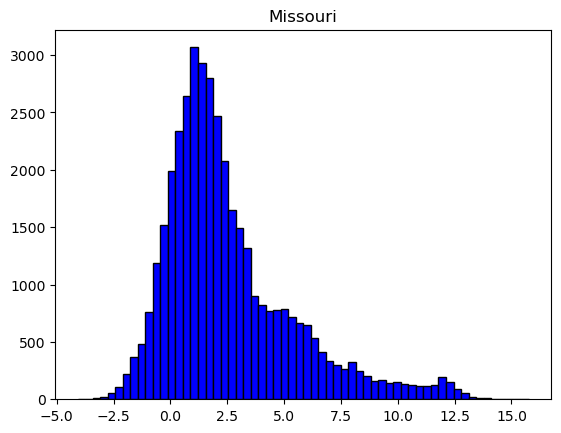

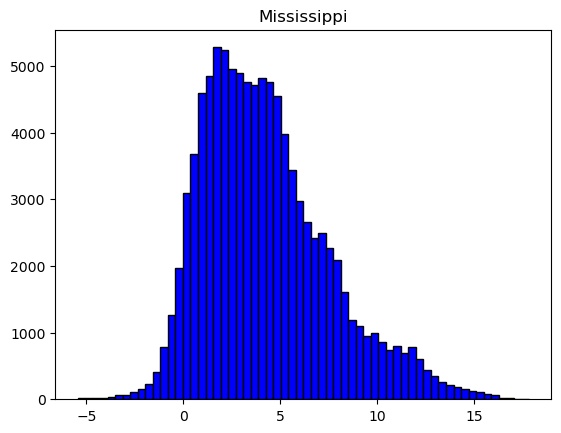

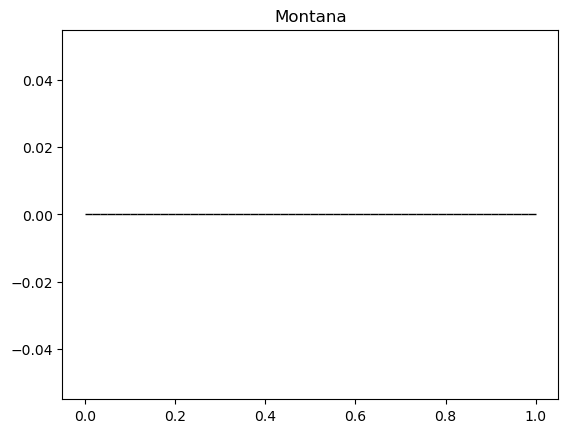

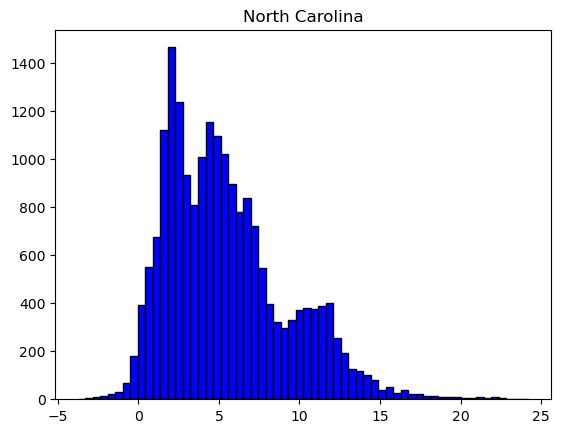

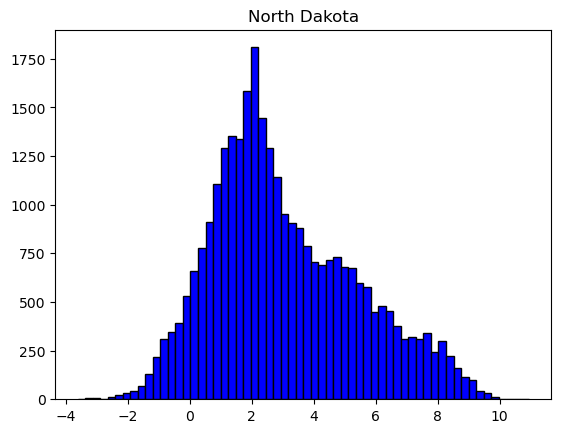

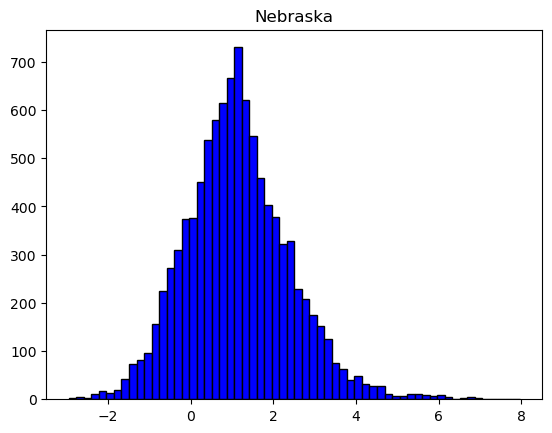

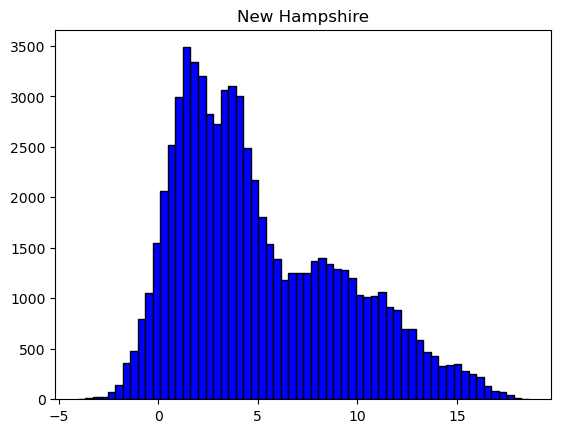

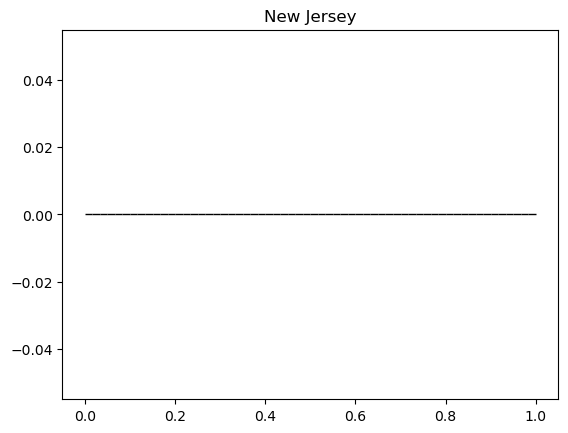

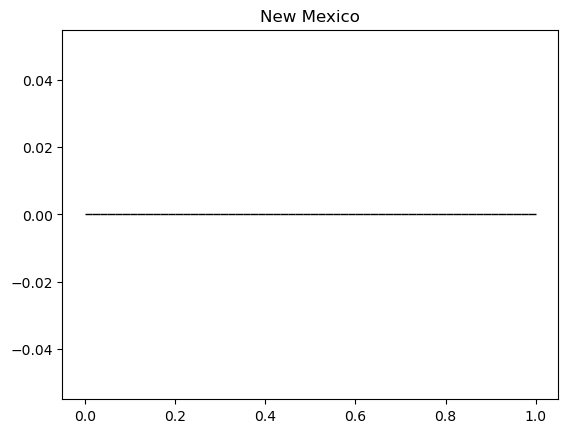

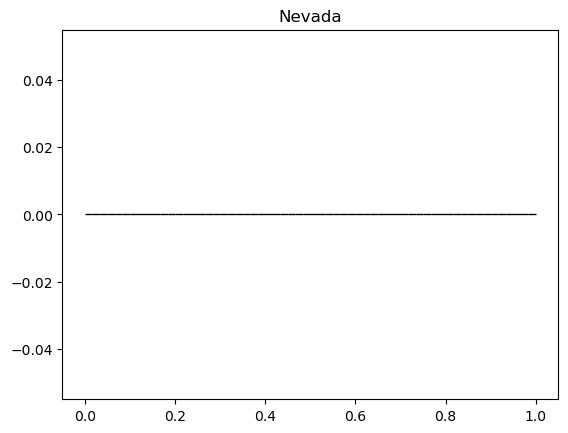

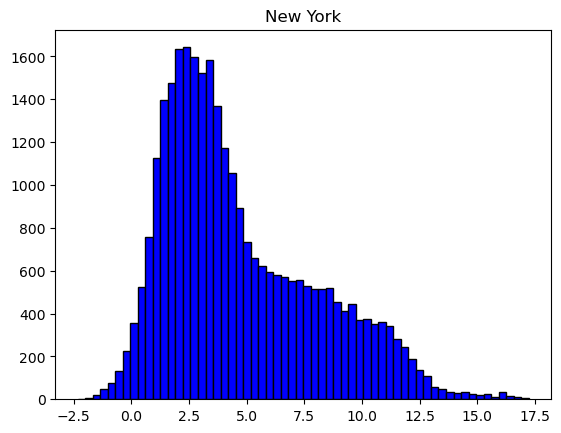

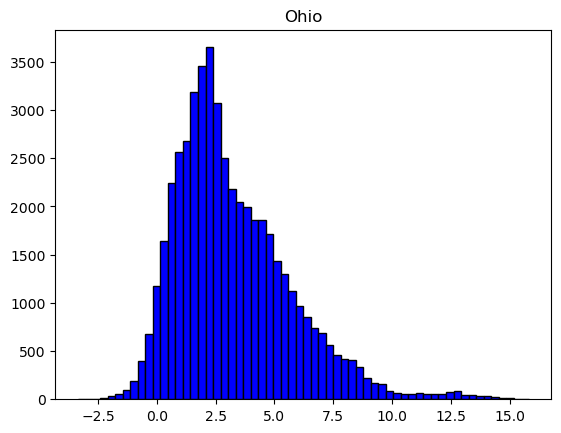

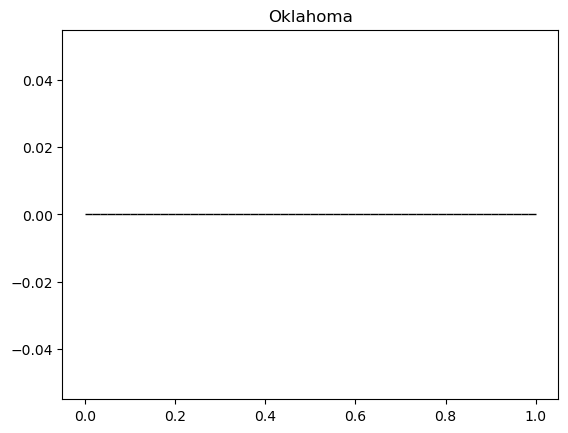

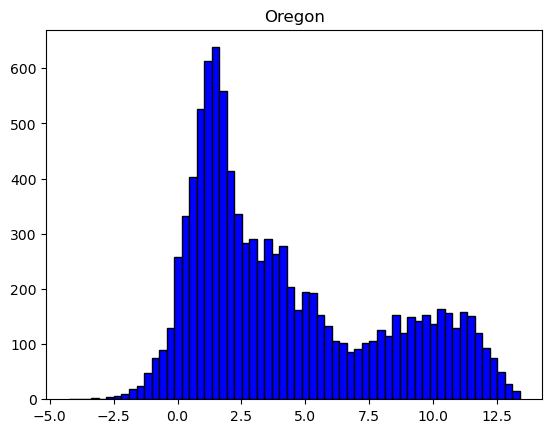

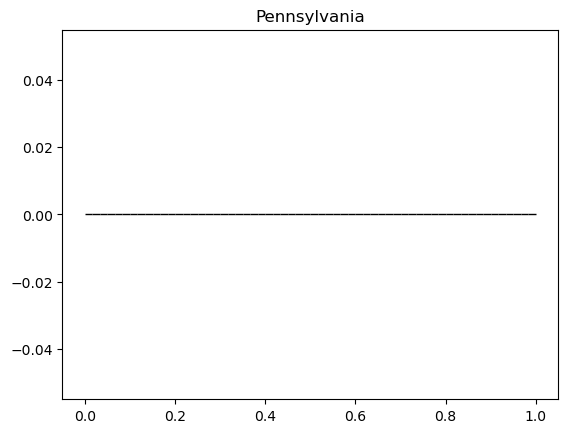

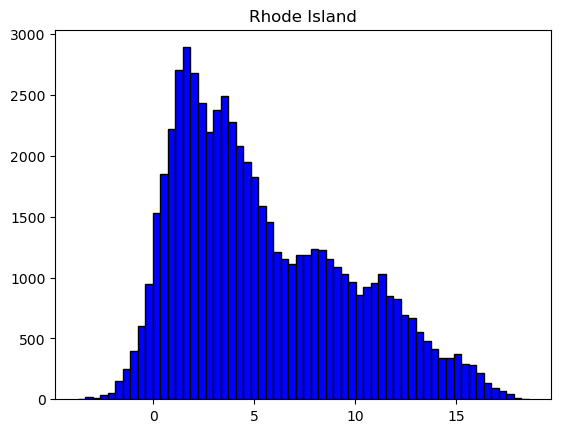

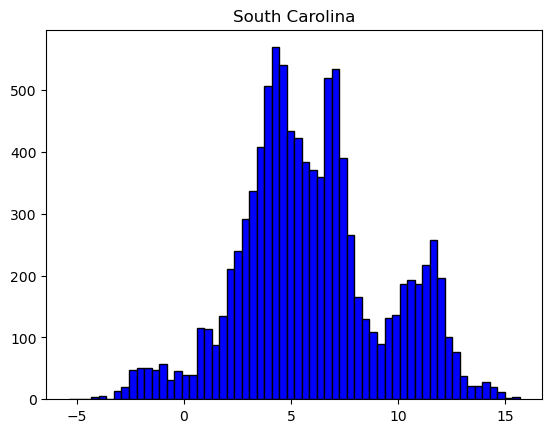

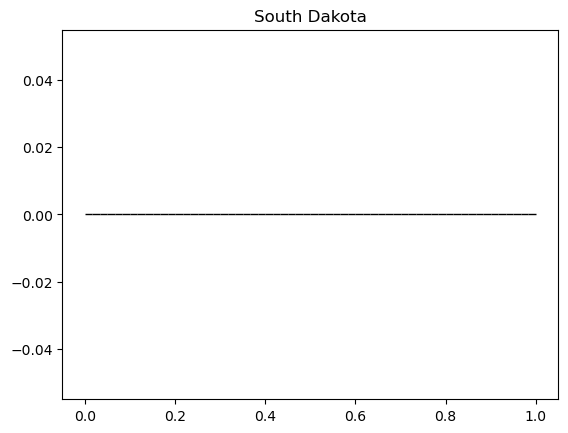

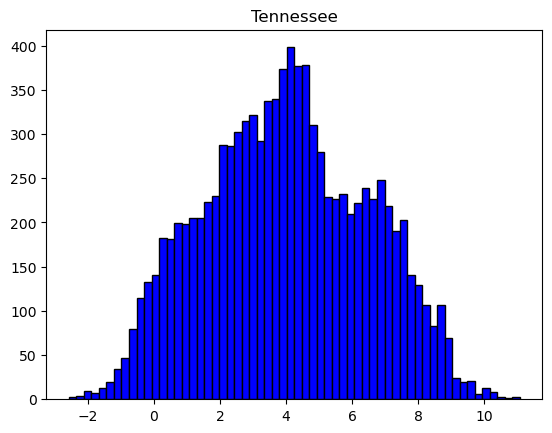

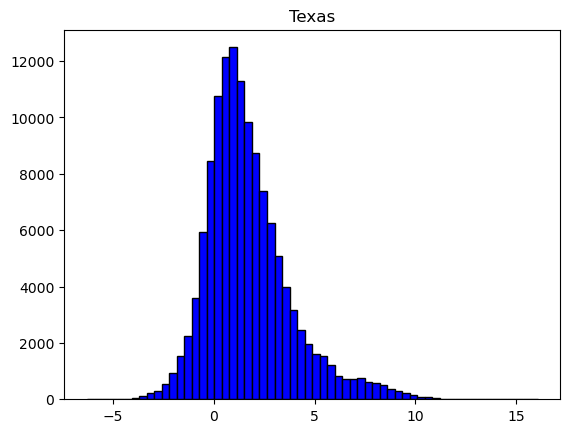

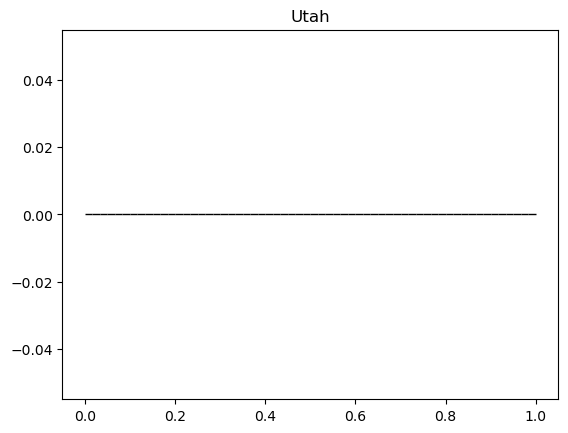

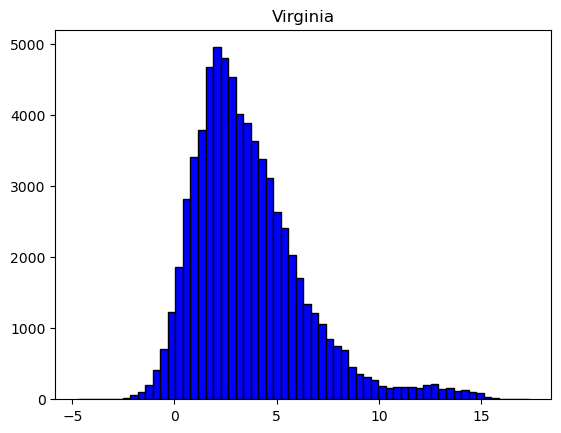

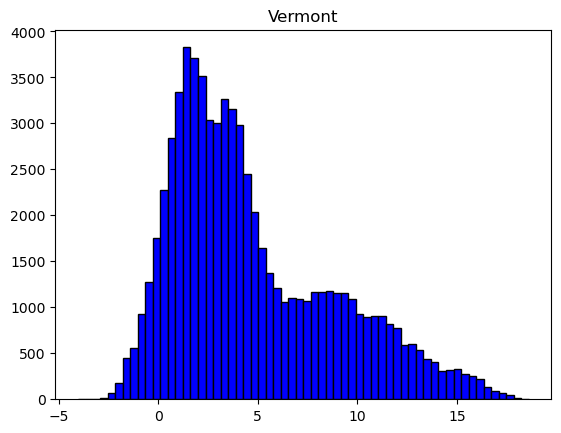

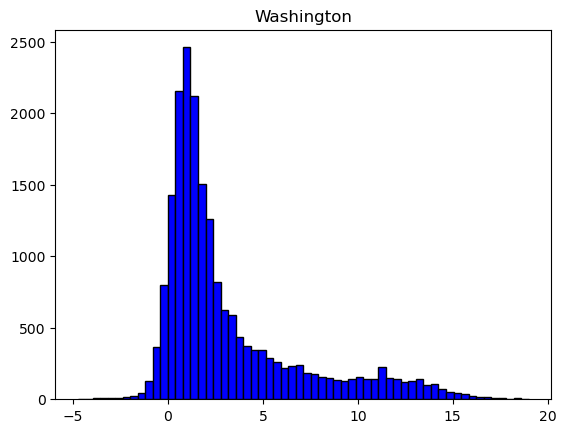

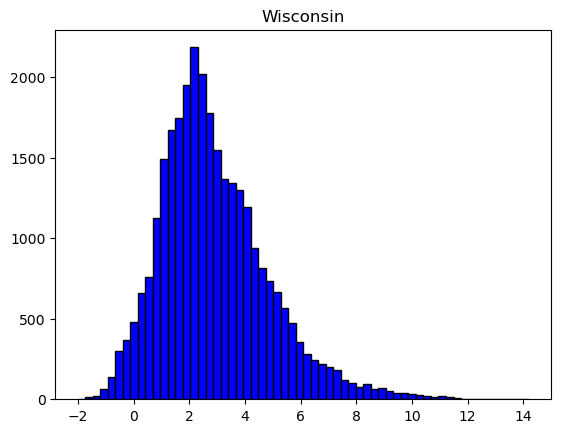

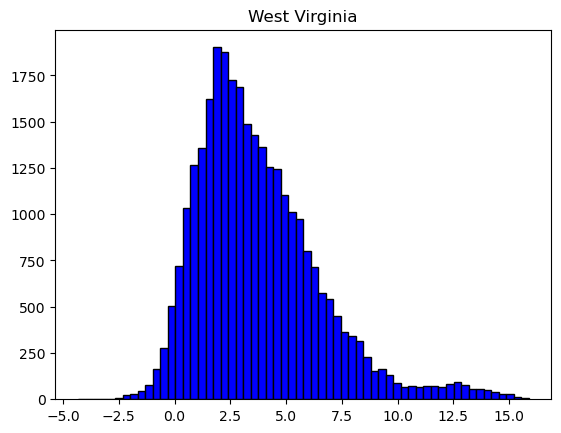

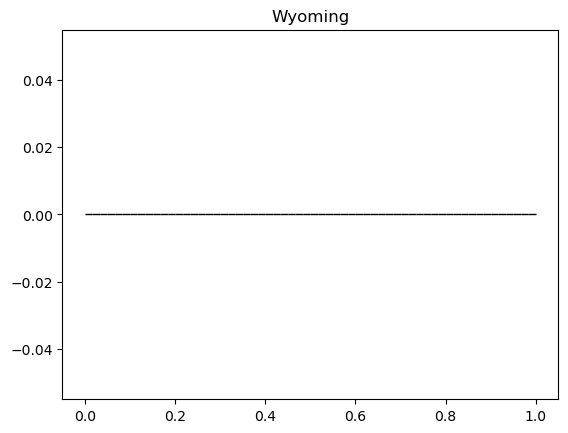

In [94]:
for i in range(len(states)):
    plt.figure()
    plt.title(states[i])
    plt.hist(state_wind_anoms[i], color='blue', edgecolor ='black', bins=60)